The purpose of this script is to go through the final datasets (gaza-israel and ukraine-russia) and for each claim check whether the final aggregated ground truth label is actually correct. This is done, since the first DEFAME model evaluation (on gaza-israel dataset) has shown that some of the ground truth labels from the fact-checking websites are incorrect, i.e. that claims are inconsistently labeled within each websites but also between websites. The goal is to find out the extent of wrong ground truth labels and think about whether the label aggregation into four final labels ("True", "False", "Misleading", "NEI") actually makes sense or whether, e.g., "False", "Misleading" and "NEI" should be one category.

The label definitions below are used for the systematic ground truth label check of both datasets. They are the exact same label definitions that were used in the model_1_run_1 DEFAME configurations (default label definitions in: DEFAME/defame/common/label.py; dataset label definitions: DEFAME/defame/eval/gaza_israel/benchmark.py and DEFAME/defame/eval/ukraine_russia/benchmark.py) for both the gaza-israel dataset (2025-07-20_09-52 default) and the ukraine-russia-dataset (2025-08-07 18-45 default):

In [ ]:
### This is the relevant part copied from DEFAME: DEFAME/common/label.py


DEFAULT_LABEL_DEFINITIONS = {
   
    ### Adding the label definitions used in the label aggregation step within my dataset creation pipeline.

    "Label.TRUE": "The knowledge from the fact-check supports the Claim. The Claim is factually accurate when it is confirmed by "
                "evidence from multiple and reliable sources. Mere plausibility is not enough for this decision.",

    "Label.FALSE": "The knowledge from the fact-check clearly refutes the Claim. The Claim is demonstrably false when it is"
                 "disproven by evidence from multiple and reliable sources. The mere absence or lack of "
                   "supporting evidence is not enough reason for being refuted.",

    "Label.MISLEADING": "The claim or image is taken out of context, mispresented in a wrong context or necessary context is omitted."
                      "For example, an old claim or image is misrepresented in a new and different context. Other examples are"
                      "to omit the context of a claim or image or to misinterpret and distort the meaning of a claim. "
                      "In contrast to the label 'FALSE' the claim or image can also contain some true elements, which are taken out of context.",    ## VERITE -> all claims had images and thus the out-of-context and miscaptioned labels are related to images
                            ## in my datasets misleading claims are both text-only claims and claims with images

    "Label.NEI": "The fact-check does not contain sufficient information to come to an conclusion. For example,"
                "there is substantial lack of evidence or the evidence is inconclusive, conflicting or self-contradictory. "
                "In the case of a lack of evidence, state which information exactly is missing. In particular, if no RESULTS or sources are available, pick this decision."

}

In [ ]:
### This is the benchmark.py file for the Gaza-Israel dataset: DEFAME/defame/eval/gaza_israel/benchmark.py



# class gaza_israel(Benchmark):
#     shorthand = "gaza_israel"

#     is_multimodal = True

#     class_mapping = { #Use the spelling of the labels in my datasets for mapping here (Starts with capital letter)
#         "True": "Label.TRUE",
#         "False": "Label.FALSE",
#         "Misleading": "Label.MISLEADING",
#         "NEI": "Label.NEI"

#     }


    ## Test these first label definitions for now. Might need some adjustments.

    ## TODO: maybe adding FEW-SHOT EXAMPLES in the class label definitions HERE???? or in the label.py file within the "common" folder?


class_definitions = {
        "Label.TRUE":
            "The claim is factually accurate when it is confirmed by evidence from multiple and reliable sources.",
        "Label.FALSE":
            "The claim is demonstrably false when it is disproven by evidence from multiple and reliable sources.",
        "Label.MISLEADING":
            "The claim or image is taken out of context, i.e. the claim or image is misrepresented in a wrong context or the necessary context is omitted. "
            "For example, an old claim or an old image is mispresented in a new context in a misleading way. If the claim refers to an image, it misrepresents the origin, content and/or meaning of the image."
            "If the claim is a text-only claim, i.e. it does not refer to an image, it misrepresents the origin, content, and/or meaning of a statement.",
        "Label.NEI":
            "The claim is marked as NEI when there is not enough evidence to verify the claim or if the evidence is conflicting or self-contradictory. "
    
    }

In [34]:
### This is the benchmark.py file for the Ukraine-Russia dataset: DEFAME/defame/eval/gaza_israel/benchmark.py
## The label definitions are exactly the same as for the gaza-israel dataset




# class ukraine_russia(Benchmark):
#     shorthand = "ukraine_russia"

#     is_multimodal = True

#     class_mapping = { #Use the spelling of the labels in my datasets for mapping here (Starts with capital letter)
#         "True": Label.TRUE,
#         "False": Label.FALSE,
#         "Misleading": Label.MISLEADING,
#         "NEI": Label.NEI

#     }


    ## Test these first label definitions for now. Might need some adjustments.

    ## TODO: maybe adding FEW-SHOT EXAMPLES in the class label definitions HERE???? or in the label.py file within the "common" folder?


class_definitions = {
        "Label.TRUE":
            "The claim is factually accurate when it is confirmed by evidence from multiple and reliable sources.",
        "Label.FALSE":
            "The claim is demonstrably false when it is disproven by evidence from multiple and reliable sources.",
        "Label.MISLEADING":
            "The claim or image is taken out of context, i.e. the claim or image is misrepresented in a wrong context or the necessary context is omitted. "
            "For example, an old claim or an old image is mispresented in a new context in a misleading way. If the claim refers to an image, it misrepresents the origin, content and/or meaning of the image."
            "If the claim is a text-only claim, i.e. it does not refer to an image, it misrepresents the origin, content, and/or meaning of a statement.",
        "Label.NEI":
            "The claim is marked as NEI when there is not enough evidence to verify the claim or if the evidence is conflicting or self-contradictory. "
    
    }

In [2]:
# import relevant libraries

import pandas as pd
import numpy as np 

### Gaza-Israel Dataset

In [3]:
## import final dataset 

df_gaza_israel_final = pd.read_csv("../../../gaza_ukraine_datasets/gaza_israel/Combined_dataset/gaza_israel_dataset_combined_010724_300425_final.csv", index_col=0)
print(len(df_gaza_israel_final))
print(df_gaza_israel_final.dtypes)
df_gaza_israel_final.head()

100
id                            int64
Website                      object
Article_URL                  object
Headline                     object
Claim_Date                   object
Review_Date                  object
Query/Keyword                object
Original_Claim_Website       object
Original_Claim_Only          object
Claim                        object
Image_URL                    object
Image_Path                   object
Label_Website                object
Label                        object
Context/Label_Explanation    object
Text_Only_Claim                bool
Normal_Image                   bool
AI_Generated_Image             bool
Altered_Image                  bool
Data_Collection_Type         object
dtype: object


,id,Website,Article_URL,Headline,Claim_Date,Review_Date,Query/Keyword,Original_Claim_Website,Original_Claim_Only,Claim,Image_URL,Image_Path,Label_Website,Label,Context/Label_Explanation,Text_Only_Claim,Normal_Image,AI_Generated_Image,Altered_Image,Data_Collection_Type
0,0,AFP Factcheck,https://factcheck.afp.com/doc.afp.com.42JE3T2,False claims about US general being killed in ...,2025-04-06 0:00:00,2025-04-17 0:00:00,Israeli-Palestinian conflict,"""BREAKING: Reports confirm the death of Genera...","""BREAKING: Reports confirm the death of Genera...","This image shows General John Pagri, Commander...",https://pbs.twimg.com/media/Gn4wjgBXoAALax1?fo...,images/gaza_israel/0.jpg,FALSE,False,A reverse image search reveals the photograph ...,False,True,False,False,Manual
1,1,AFP Factcheck,https://factcheck.afp.com/doc.afp.com.39432WD,"Pictures show Gaza in ruins, not Myanmar quake...",2025-03-29 0:00:00,2025-04-17 0:00:00,Israeli-Palestinian conflict,"""A 7.9-magnitude earthquake in Myanmar, devast...","""A 7.9-magnitude earthquake in Myanmar, devast...",This image shows the ruins after a 7.9-magnitu...,https://web.archive.org/web/20250402070342im_/...,images/gaza_israel/1.jpg,FALSE,False,"However, a reverse image search for the first ...",False,True,False,False,Manual
2,2,AFP Factcheck,https://factcheck.afp.com/doc.afp.com.37W26WD,Image of 'Gazan mother with son's bones' is ma...,2025-03-24 0:00:00,2025-03-27 0:00:00,Israeli-Palestinian conflict,"""A mother holds the bones of her son in Gaza. ...","""A mother holds the bones of her son in Gaza. ...",This is an authentic image of a mother holding...,https://web.archive.org/web/20250527092039/htt...,images/gaza_israel/2.jpg,FALSE,False,A keyword search found a wider-angle version o...,False,False,True,False,Manual
3,3,AFP Factcheck,https://factcheck.afp.com/doc.afp.com.36XY2FV,Old image misrepresented as 'Israeli settlers'...,2025-02-16 0:00:00,2025-02-19 0:00:00,Israeli-Palestinian conflict,"""Israeli media reports there are Jews who have...","""Israeli media reports there are Jews who have...",This image shows Israelis who have stopped fig...,https://pbs.twimg.com/media/Gj5tbXiaQAAoG1z?fo...,images/gaza_israel/3.jpg,FALSE,False,A reverse image search via Google traced the v...,False,True,False,False,Manual
4,4,AFP Factcheck,https://factcheck.afp.com/doc.afp.com.36RF6BZ,"Picture shows Israel's 2018 Gaza attack, not a...",2024-12-22 0:00:00,2024-12-26 0:00:00,Israeli-Palestinian conflict,"""Americans bombarded Yemen in reprisal after Y...","""Americans bombarded Yemen in reprisal after Y...",This image shows the U.S. bombarding Yemen on ...,https://media.gettyimages.com/id/1060718622/de...,images/gaza_israel/4.jpg,FALSE,False,But a reverse image search on Google found the...,False,True,False,False,Manual


In [4]:
pd.set_option('display.max_colwidth',500)  
df_gaza_israel_final[df_gaza_israel_final["Label"] == "NEI"]

,id,Website,Article_URL,Headline,Claim_Date,Review_Date,Query/Keyword,Original_Claim_Website,Original_Claim_Only,Claim,Image_URL,Image_Path,Label_Website,Label,Context/Label_Explanation,Text_Only_Claim,Normal_Image,AI_Generated_Image,Altered_Image,Data_Collection_Type
15,15,AFP Factcheck,https://factcheck.afp.com/doc.afp.com.367P9XU,No evidence Montreal mayor authorized pro-Palestinian traffic signs,2024-07-24 0:00:00,2024-08-06 0:00:00,Israeli-Palestinian conflict,"""So the Mayor is using taxpayer dollars to incite another October 7,"" says a July 24, 2024 X post, referencing Hamas's attack on Israel. The post includes photos of traffic warning signs broadcasting the messages ""Globalize The Intifada"" and ""Free Palestine Escalate Now."" Different accounts shared the same photos on X, Facebook and Threads, claiming the mayor or city had signed off on messages that could incite violence in Quebec's largest city.","""So the Mayor is using taxpayer dollars to incite another October 7.""",This image shows a traffic sign in Montreal in July 2024 which displays a 'Free Palestine. Escalate now' message and was authorized by Montreal's Mayor Valérie Plante.,https://i.cbc.ca/1.7274812.1721903270!/cpImage/httpImage/image.jpg_gen/derivatives/16x9_1180/mtl-pirated-signs-20240724.jpg?im=Resize%3D780,images/gaza_israel/15.jpg,unproven,NEI,"Some news headlines implied the boards were hacked, but Nuñez told AFP the locks on the signs were broken and the words were manually entered. A July 24 Instagram post from Clash MTL and Palestine Action Montreal describes how someone diverted road signs in Montreal to display messages ""in solidarity with Palestine."" The post, whose caption says ""anonymous submission,"" includes a video showing the same slogans as those in the claims circulating online.",False,True,False,False,Manual
20,20,Reuters,https://www.reuters.com/fact-check/no-evidence-us-spent-50-million-condoms-gaza-2025-01-30/,Fact Check: No evidence US spent $50 million on condoms for Gaza,2025-01-28 0:00:00,2025-01-30 0:00:00,"""Gaza Fact Check""","Posts online, sharing a clip of Leavitt’s remarks said: “WILD: Karoline Leavitt EXPOSED that $50 MILLION in U.S. taxpayer money almost went to fund CONDOMS in Gaza before DOGE cut it.”",“WILD: Karoline Leavitt EXPOSED that $50 MILLION in U.S. taxpayer money almost went to fund CONDOMS in Gaza before DOGE cut it.”,$50 Million in US taxpayer money almost went to fund condoms in Gaza before DOGE cut it.,NaN,NaN,no evidence,NEI,Statements from the Trump administration saying it discovered a plan to send $50 million to fund condoms in Gaza have been denied by the humanitarian group named as the recipient and by a former U.S. official.,True,False,False,False,Manual
48,48,Snopes,https://www.snopes.com/fact-check/trump-netanyahu-ceasefire-harris/,Trump Denies Telling Netanyahu to Stop Gaza Ceasefire Deal As It Would Help Harris Campaign,2024-08-20 0:00:00,2024-08-22 0:00:00,"""Gaza""","In a phone call with Benjamin Netanyahu, Donald Trump told the Israeli prime minister to stop a Gaza ceasefire deal because it would help Vice President Kamala Harris' 2024 presidential campaign.","""In a phone call with Benjamin Netanyahu, Donald Trump told the Israeli prime minister to stop a Gaza ceasefire deal because it would help Vice President Kamala Harris' 2024 presidential campaign.""","In a phone call with Benjamin Netanyahu on August 14, 2024, Donald Trump told the Israeli prime minister to stop a Gaza ceasefire deal because it would help Vice President Kamala Harris' 2024 presidential campaign.",NaN,NaN,unproven,NEI,"In statements to Snopes, Trump's office denied that such a phone call even took place, while Netanyahu's team said the story was not true. Woodruff also corrected herself in the aftermath, and said her comments were a ""mistake."" There was also no independent verification about the topics discussed on the purported phone call, as reported by Axios, who added an editor's note to their article, 

- id 15: could also be aggregated to "False"
- id 20: could also be aggregated to "False"
- id 48: more difficult
- id 70: should probably be "Misleading" --> see gt check below


In [5]:
## import the dataframe with the label definitions of each fact-checking website used in the gaza-israel dataset

df_gaza_israel_websites_methodology = pd.read_csv("../../../gaza_ukraine_datasets/gaza_israel/Combined_dataset/df_gaza_israel_websites_methodology_label_overview.csv", index_col=0)
print(len(df_gaza_israel_websites_methodology))
df_gaza_israel_websites_methodology.head()

42


,AFP Factcheck,Reuters,Snopes,Politifact,misbar.com,logicallyfacts.com,newsmeter.in,usatoday.com,checkyourfact.com
Altered,NaN,"Genuine image, audio, or video that has been manipulated with the intent to deceive or harm.",NaN,NaN,NaN,NaN,NaN,NaN,NaN
Altered Photo,When a photo has been manipulated to deceive.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Altered Video,When a video has been manipulated to deceive.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Commotion,NaN,NaN,NaN,NaN,"The title and claim contain exaggerated elements aimed to attract attention and arouse the readers’ interest, but the content of the story is unrelated to the claim or the title.",NaN,NaN,NaN,NaN
Correct Attribution,NaN,NaN,This rating indicates that quoted material (speech or text) has been correctly attributed to the person who spoke or wrote it.,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
## Go through each claim and add a column to the df which states whether the ground truth label ("Label") is correct or not. Add a second column which, if applicable, states what the actual ground truth label should be
## Also add a third column which gives the justification, why the ground truth label is wrong or why it should be different.
## Create a dictionary to store this information and append it to the df 


### 1) Start with the first 5 claims

pd.set_option('display.max_colwidth', None)


df_gaza_israel_final[:5]

,id,Website,Article_URL,Headline,Claim_Date,Review_Date,Query/Keyword,Original_Claim_Website,Original_Claim_Only,Claim,Image_URL,Image_Path,Label_Website,Label,Context/Label_Explanation,Text_Only_Claim,Normal_Image,AI_Generated_Image,Altered_Image,Data_Collection_Type
0,0,AFP Factcheck,https://factcheck.afp.com/doc.afp.com.42JE3T2,False claims about US general being killed in Gaza spread online,2025-04-06 0:00:00,2025-04-17 0:00:00,Israeli-Palestinian conflict,"""BREAKING: Reports confirm the death of General John Pagri, Commander of the Special Tasks Battalion in the U.S. Army, in the Gaza Strip,"" says an April 6, 2025 X post with more than 30,000 likes.","""BREAKING: Reports confirm the death of General John Pagri, Commander of the Special Tasks Battalion in the U.S. Army, in the Gaza Strip.""","This image shows General John Pagri, Commander of the Special Tasks Battalion in the U.S. Army, which has died in the Gaza Strip in April 2025.",https://pbs.twimg.com/media/Gn4wjgBXoAALax1?format=jpg&name=medium,images/gaza_israel/0.jpg,FALSE,False,"A reverse image search reveals the photograph was uploaded to Wikimedia Commons, a website that collects free-use images, with a description that says that it was taken in 2007 in Iraq's Babil province (archived here). Wikimedia Commons credits a blog post from the US National Guard as the source of the image. While the site has since been deleted, an archived version available via the Internet Archive says that the men in the image are two sergeants named Robbie Doman and Christopher W. Sullenberger. Doman, standing in the middle of the photograph, received media coverage in 2017 when he appeared on the NBC television show ""American Ninja Warrior"" after being injured in an explosion in 2008 (archived here, and here). Several US media outlets published images of Doman from his service in Iraq, which are similar to those used in the social media posts (archived here).",False,True,False,False,Manual
1,1,AFP Factcheck,https://factcheck.afp.com/doc.afp.com.39432WD,"Pictures show Gaza in ruins, not Myanmar quake damage",2025-03-29 0:00:00,2025-04-17 0:00:00,Israeli-Palestinian conflict,"""A 7.9-magnitude earthquake in Myanmar, devastation everywhere, everything in ruins,"" read part of a simplified Chinese caption of a Facebook post published March 29.","""A 7.9-magnitude earthquake in Myanmar, devastation everywhere, everything in ruins.""","This image shows the ruins after a 7.9-magnitude earthquake in Myanmar on March 28, 2025.",https://web.archive.org/web/20250402070342im_/https://scontent-sjc3-1.xx.fbcdn.net/v/t39.30808-6/487419008_122233817522067190_5197398173696178365_n.jpg?stp=dst-jpg_s600x600_tt6&_nc_cat=108&ccb=1-7&_nc_sid=833d8c&_nc_ohc=Vrh6myPuQ6QQ7kNvgEk5XXK&_nc_oc=AdlUD89_DZpLh7YT1h3kFtbXsa5hjVVf72r_jD7lK9JlOF-ZbIpsMP742_7qAbGCwXM&_nc_zt=23&_nc_ht=scontent-sjc3-1.xx&_nc_gid=fSR43b_Iy30vsY8iyeCKXQ&oh=00_AYHnGD8C7-NR7_yARBjobfW6AGmcjuJ4rs3dDhokDkqldw&oe=67F29A7A,images/gaza_israel/1.jpg,FALSE,False,"However, a reverse image search for the first photo in the post led to a TikTok video shared February 20 by a user based in Gaza. The clip shows the same destroyed building (archived link). A photo from the Turkish Anadolu news agency shows the same scene. ""A view of the destruction in Jabalia camp after Israeli forces withdrew from the area following the ceasefire in Gaza on February 05, 2025,"" the caption says.",False,True,False,False,Manual
2,2,AFP Factcheck,https://factcheck.afp.com/doc.afp.com.37W26WD,Image of 'Gazan mother with son's bones' is made with AI,2025-03-24 0:00:00,2025-03-27 0:00:00,Israeli-Palestinian conflict,"""A mother holds the bones of her son in Gaza. After more than a year and a half of searching for him under the rubble of their bombed-out house,"" reads a Malay-language Facebook post shared on March 24.","""A mother holds the bones of her son in Gaza. After more than a year and a half of searching for him under the rubble of their bombed-out house.""",Thi

In [7]:
gt_label_check_part_1 = {

    0: {
        "gt_label_incorrect": True,
        "actual_gt_label": "Misleading",
        "justification_gt_label_correct/incorrect": """ The image shows different US soldiers in a different context (2007 in Iraq). 
                                                The AFP Factcheck methodology also defines the label 'Misleading' as: 'an item is misleading when it uses genuine information (text, photo or video), taken out of context or mixed with false context'.""" 

    },

    1: {
        "gt_label_incorrect": True,
        "actual_gt_label": "Misleading",
        "justification_gt_label_correct/incorrect": """ The image is taken out of context and was taken in Gaza on February 2025.
                                                The AFP Factcheck methodology also defines the label 'Misleading' as: 'an item is misleading when it uses genuine information (text, photo or video), taken out of context or mixed with false context'."""

        
    },

    2: {
        "gt_label_incorrect": False, #the same as original final "Label"
        "actual_gt_label": "False",
        "justification_gt_label_correct/incorrect": """ The label is correct, since it refers to an AI image. All claims with AI images have been reformulated in a consistent way so all have the final label "False"."""
    },

    3: {
        "gt_label_incorrect": True,
        "actual_gt_label": "Misleading",
        "justification_gt_label_correct/incorrect": """ The image is taken out of context and is from Thailand in October 2024.
                                                The AFP Factcheck methodology also defines the label 'Misleading' as: 'an item is misleading when it uses genuine information (text, photo or video), taken out of context or mixed with false context'."""
    },

    4: {
        "gt_label_incorrect": True,
        "actual_gt_label": "Misleading",
        "justification_gt_label_correct/incorrect": """ The image is taken out of context and it shows Israel's 2018 Gaza attack.
                                                        The AFP Factcheck methodology also defines the label 'Misleading' as: 'an item is misleading when it uses genuine information (text, photo or video), taken out of context or mixed with false context'."""
    }
}

In [8]:
df_gaza_israel_websites_methodology["AFP Factcheck"]

Altered                                                                                                                                                        NaN
Altered Photo                                                                                                        When a photo has been manipulated to deceive.
Altered Video                                                                                                        When a video has been manipulated to deceive.
Commotion                                                                                                                                                      NaN
Correct Attribution                                                                                                                                            NaN
Fake                                                                                                                                                           NaN
False                 

In [9]:
## 2) the next 5 claims

df_gaza_israel_final[5:10]

,id,Website,Article_URL,Headline,Claim_Date,Review_Date,Query/Keyword,Original_Claim_Website,Original_Claim_Only,Claim,Image_URL,Image_Path,Label_Website,Label,Context/Label_Explanation,Text_Only_Claim,Normal_Image,AI_Generated_Image,Altered_Image,Data_Collection_Type
5,5,AFP Factcheck,https://factcheck.afp.com/doc.afp.com.36NF2UW,"Photo shows Israeli helicopter firing flares over Gaza, not 'shot down in Lebanon'",2024-11-24 0:00:00,2024-12-02 0:00:00,Israeli-Palestinian conflict,"""Lebanon shot down its enemy's helicopter,"" read a Thai-language Facebook post shared on November 24, 2024.","""Lebanon shot down its enemy's helicopter.""","This image shows an Israeli helicopter shot down by Hezbollah amid clashes in Southern Lebanon on November 23, 2024.",https://t1.blockdit.com/photos/2024/11/67417966c5d700bda4e839f6.jpg,images/gaza_israel/5.jpg,FALSE,False,"A reverse image search on Google led to the same photo used in a report published by The Times of Israel newspaper on May 20, 2019 (archived link). The photo is credited to AFP photographer Mohammed Abed, and its caption read: ""An Israeli helicopter shoots flares over the Gaza Strip hours after a rocket from the Palestinian enclave hit a house near Tel Aviv and wounded seven people, leading to fears of a severe escalation, on March 25, 2019.""",False,True,False,False,Manual
6,6,AFP Factcheck,https://factcheck.afp.com/doc.afp.com.36MV6KT,AI-generated image used to falsely claim Netanyahu hospitalized,2024-11-17 0:00:00,2024-11-20 0:00:00,Israeli-Palestinian conflict,"""BREAKING NETANYAHU HOSPITALISED He suffered serious health issue in Kiryah and has been shifted to a hospital in Tel Aviv,"" says a November 17 X post from Sulaiman Ahmed, a creator who has monetized misinformation about Israel's war with Hamas.","""BREAKING NETANYAHU HOSPITALISED He suffered serious health issue in Kiryah and has been shifted to a hospital in Tel Aviv.""",This is an authentic image of Benjamin Netanyahu being hospitalized in Tel Aviv in November 2024 due to a serious health issue.,https://web.archive.org/web/20250527084750/https://scontent-lga3-3.xx.fbcdn.net/v/t39.30808-6/467574066_10159703629306377_2271087948666621641_n.jpg?_nc_cat=106&ccb=1-7&_nc_sid=833d8c&_nc_ohc=mjEENeprBt0Q7kNvwGIVfis&_nc_oc=AdlkejvMDeoN0-iE9ET47GMj1dHdfFe_ZSuk28X6ZWZzqPcQd0I-k3B8elQpN3uWqOE&_nc_zt=23&_nc_ht=scontent-lga3-3.xx&_nc_gid=z-dhuDr08eHSGxpcKHZLKg&oh=00_AfIO0GR513p_0oFMAn1xefKBr2Q5Mxg4cmpe2lBg62SzEg&oe=683B5472,images/gaza_israel/6.jpg,FALSE,False,"However, November 2024 social media posts claiming he was hospitalized with a ""serious health issue"" are false; the Israeli leader gave a speech to lawmakers when he was supposedly admitted, and experts told AFP the image shared online is likely AI-generated. The photo being shared of Netanyahu was likely generated by artificial intelligence, experts said. Hany Farid, a digital forensics expert at the University of California-Berkeley (archived here), said he analyzed the image using three models trained to identify pictures created using artificial intelligence, all of which classified it as ""likely"" being AI-generated. He told AFP on November 19 that he compared the image with actual photographs of Netanyahu and found the left ear was different from that of the Israeli prime minister, indicating it is ""not authentic."" Siwei Lyu, director of the State University of New York at Buffalo's Media Forensic Lab (archived here), also ran the image through a program designed to detect deepfake images and found it is likely not authentic. He, too, noted differences in the shape of the prime minister's ear compared to the one seen in the posts.",False,False,True,False,Manual
7,7,AFP Factcheck,https://factcheck.afp.com/doc.afp.com.36MT424,Posts falsely claim Huthis declared ceasefire after Trump victory,2024-11-06 0:00:00,2024-11-18 0:00:00,Israeli-Palestinian conflict,"""Huthi spokesman: Our operations in international waters were defensive only and we announce their

In [10]:
gt_label_check_part_2 = {


    5: {
        "gt_label_incorrect": True,
        "actual_gt_label": "Misleading",
        "justification_gt_label_correct/incorrect": """ The image is taken out of context and is from Gaza on March 2019. 
                                                The AFP Factcheck methodology also defines the label 'Misleading' as: 'an item is misleading when it uses genuine information (text, photo or video), taken out of context or mixed with false context'.""" 

    },

    6: {
        "gt_label_incorrect": False,
        "actual_gt_label": "False", #the same as original final "Label"
        "justification_gt_label_correct/incorrect": """ The label is correct, since it refers to an AI image. All claims with AI images have been reformulated in a consistent way so all have the final label "False"."""

    },

    7: 

    {
        "gt_label_incorrect": False,
        "actual_gt_label": "False", #the same as original final "Label"
        "justification_gt_label_correct/incorrect": """ The militant group has said it will not halt its military operations. The claim is clearly wrong and also not a misinterpretation of the Houthis statement. """
    },

    8: 
    {
        "gt_label_incorrect": True,
        "actual_gt_label": "Misleading",
        "justification_gt_label_correct/incorrect": """ The image is presented out of context and actually shows a different Israeli bombardment in Lebanon."""

    },

    9: {

        "gt_label_incorrect": True,
        "actual_gt_label": "Misleading",
        "justification_gt_label_correct/incorrect": """ The image is presented out of context and shows a blaze at Iranian refinery in 2021 and not the impact of Israeli airstrikes."""

    }

    
}

In [11]:
## 3) the next 5 claims

df_gaza_israel_final[10:15]

,id,Website,Article_URL,Headline,Claim_Date,Review_Date,Query/Keyword,Original_Claim_Website,Original_Claim_Only,Claim,Image_URL,Image_Path,Label_Website,Label,Context/Label_Explanation,Text_Only_Claim,Normal_Image,AI_Generated_Image,Altered_Image,Data_Collection_Type
10,10,AFP Factcheck,https://factcheck.afp.com/doc.afp.com.36KL83M,AI-generated images falsely claimed to show bombing near Beirut airport,2024-10-20 0:00:00,2024-10-25 0:00:00,Israeli-Palestinian conflict,"""A PHOTO FOR THE HISTORY BOOKS MEA airline landing in Beirut International Airport as Israeli rains fire on the airport,"" says an October 20 X post from Sulaiman Ahmed, a creator who has previously monetized misinformation about Israel's war with Hamas.","""A PHOTO FOR THE HISTORY BOOKS MEA airline landing in Beirut International Airport as Israeli rains fire on the airport.""",This is an authentic image of Israel bombing Beirut's International Airport in October 2024.,https://pbs.twimg.com/media/GaXV9qgWAAA3Pv3?format=jpg&name=large,images/gaza_israel/10.jpg,FALSE,False,"A spokesperson for Middle East Airlines told AFP in an October 21 email that the images appear to be AI-generated and are ""far from reality."" A keyword search of public social media pages reveals the first handful of Instagram accounts that posted the pictures. They say the pictures were created using artificial intelligence and credit the profile south.to.north (archived here and here).",False,False,True,False,Manual
11,11,AFP Factcheck,https://factcheck.afp.com/doc.afp.com.36K38U9,Hezbollah strike did not kill IDF chief Herzi Halevi,2024-10-13 0:00:00,2024-10-15 0:00:00,Israeli-Palestinian conflict,"""BREAKING Initial reports confirm the assassination of Israeli Army Chief of Staff, Herzi Halevi,"" says an October 13, 2024 X post from Anastasia Maria Loupis, a Danish physician who has previously shared misinformation about the Israel-Hamas war.","""BREAKING Initial reports confirm the assassination of Israeli Army Chief of Staff, Herzi Halevi.""","The chief of the Israeli Defense Forces (IDF), Herzi Halevi, was assassinated in a Hezbollah drone attack on an Israeli military base on October 13, 2024.",NaN,NaN,FALSE,False,"However, claims on social media that the chief of the Israeli Defense Forces (IDF) was killed in an October 13, 2024 attack on a military base are false; Herzi Halevi visited the base after the drone strike.",True,False,False,False,Manual
12,12,AFP Factcheck,https://factcheck.afp.com/doc.afp.com.36J32WX,"UN top court ruled 'illegal' Israel's occupation of Palestinian territory, not Israeli state",2024-09-04 0:00:00,2024-10-09 0:00:00,Israeli-Palestinian conflict,"""Breaking News: Israel has been declared an illegal state by the International Court of Justice,"" read a Malay-language post on Facebook on September 4, 2024. ""The court also ruled that Israel cannot be a sovereign state. At last, justice has prevailed.""","""Breaking News: Israel has been declared an illegal state by the International Court of Justice.""",Israel has been declared an illegal state by the International Court of Justice in July 2024.,NaN,NaN,FALSE,False,"The court had instead found Israel's decades-long occupation of Palestinian territory as unlawful and said it should come to an end ""as rapidly as possible"". The ICJ said Israel's continued occupation of Palestinian territories was against international law, in a nonbinding advisory opinion issued on July 19 on the request of the UN General Assembly. In June 1967, Israel crushed some of its Arab neighbours in a six-day war, seizing the West Bank and East Jerusalem, at the time annexed by Jordan, the Golan Heights from Syria, and the Gaza Strip and Sinai Peninsula from Egypt.",True,False,False,False,Manual
13,13,AFP Factcheck,https://factcheck.afp.com/doc.afp.com.36HV7P9,Posts falsely claim to show attack on US forces in Baghdad\n\n,2024-09-30 0:00:00,2024-10-03 0:00:00,Israeli-Palestinian conflict,"""BREAKING: US military base comes under att

In [12]:
gt_label_check_part_3 = {


    10: {
        "gt_label_incorrect": False,
        "actual_gt_label": "False", #the same as original final "Label"
        "justification_gt_label_correct/incorrect": """ The label is correct, since it refers to an AI image. All claims with AI images have been reformulated in a consistent way so all have the final label "False".""" 

    },

    11: {
        "gt_label_incorrect": False,
        "actual_gt_label": "False", #the same as original final "Label"
        "justification_gt_label_correct/incorrect": """ The label is correct. The claim is clearly wrong and was disproven."""

    },

    12: 
    {
        "gt_label_incorrect": False,
        "actual_gt_label": "False", #the same as original final "Label"
        "justification_gt_label_correct/incorrect": """ The ICJ has ruled the occupation illegal, not the state of Israel. If one interprets the claim as a misinterpretation/misrepresentation
         of the ICJ ruling, one could argue it could also be the label 'Misleading'. I will keep the label 'False' here, because the claim can be clearly disproven by evidence. """
    },

    13: 
    {
        "gt_label_incorrect": True,
        "actual_gt_label": "Misleading",
        "justification_gt_label_correct/incorrect": """ The image is presented out of context and actually shows an explosion at a gas station in the US in 2011."""

    },

    14: {

        "gt_label_incorrect": True,
        "actual_gt_label": "Misleading",
        "justification_gt_label_correct/incorrect": """ The image is presented out of context and shows a exploded toilet in Hong Kong in 2020."""

    }

    
}

In [13]:
## 4) the next 5 claims

df_gaza_israel_final[15:20]

,id,Website,Article_URL,Headline,Claim_Date,Review_Date,Query/Keyword,Original_Claim_Website,Original_Claim_Only,Claim,Image_URL,Image_Path,Label_Website,Label,Context/Label_Explanation,Text_Only_Claim,Normal_Image,AI_Generated_Image,Altered_Image,Data_Collection_Type
15,15,AFP Factcheck,https://factcheck.afp.com/doc.afp.com.367P9XU,No evidence Montreal mayor authorized pro-Palestinian traffic signs,2024-07-24 0:00:00,2024-08-06 0:00:00,Israeli-Palestinian conflict,"""So the Mayor is using taxpayer dollars to incite another October 7,"" says a July 24, 2024 X post, referencing Hamas's attack on Israel. The post includes photos of traffic warning signs broadcasting the messages ""Globalize The Intifada"" and ""Free Palestine Escalate Now."" Different accounts shared the same photos on X, Facebook and Threads, claiming the mayor or city had signed off on messages that could incite violence in Quebec's largest city.","""So the Mayor is using taxpayer dollars to incite another October 7.""",This image shows a traffic sign in Montreal in July 2024 which displays a 'Free Palestine. Escalate now' message and was authorized by Montreal's Mayor Valérie Plante.,https://i.cbc.ca/1.7274812.1721903270!/cpImage/httpImage/image.jpg_gen/derivatives/16x9_1180/mtl-pirated-signs-20240724.jpg?im=Resize%3D780,images/gaza_israel/15.jpg,unproven,NEI,"Some news headlines implied the boards were hacked, but Nuñez told AFP the locks on the signs were broken and the words were manually entered. A July 24 Instagram post from Clash MTL and Palestine Action Montreal describes how someone diverted road signs in Montreal to display messages ""in solidarity with Palestine."" The post, whose caption says ""anonymous submission,"" includes a video showing the same slogans as those in the claims circulating online.",False,True,False,False,Manual
16,16,AFP Factcheck,https://factcheck.afp.com/doc.afp.com.368W46C,Israeli swimmers' tribute to Gaza hostages predates Olympics\n\n,2024-07-27 0:00:00,2024-08-05 0:00:00,Israeli-Palestinian conflict,"""The Israeli Olympic team was not allowed to wear their yellow 'Bring Them Home' pins at the Olympic games so they decided to spell it out for the entire world to see it!"" says Rob Shuter, a UK gossip columnist, in a July 27, 2024 Facebook post with thousands of interactions.","""The Israeli Olympic team was not allowed to wear their yellow 'Bring Them Home' pins at the Olympic games so they decided to spell it out for the entire world to see it!""",This image shows the Israeli Olympic team spelling out 'Bring Them Home' at the 2024 Olympic games because they were not allowed to wear their yellow 'Bring Them Home' pins.,"https://ynet-pic1.yit.co.il/cdn-cgi/image/f=auto,w=740,q=75/picserver5/crop_images/2023/11/19/Sk4M5SDET/Sk4M5SDET_18_11_1483_1933_0_x-large.jpg",images/gaza_israel/16.jpg,misleading,Misleading,"While the picture shared online is real, it predates the Paris Olympics by eight months. A reverse image search reveals Israel's artistic swimming team posted the photo November 19, 2023 on Instagram (archived here). The caption says the picture was taken at the Wingate Institute, Israel's national sports training center outside Tel Aviv, and that it features 10 artistic swimmers. Among the athletes are Shelly Bobritsky and Ariel Nassee, who qualified for the 2024 Paris Olympics as part of the duet category (archived here and here). Israeli news outlets including the Arabic-language service of i24News reported on the team's photo in November 2023 (archived here and here). Israeli drone photographer Adam Spiegel posted the picture on Instagram the same day as the Israeli Artistic Swimming Team (archived here). Spiegel confirmed in a July 30 email that he took the original image, compiling several aerial shots of the swimmers into a composite collage. He said he was ""disappointed"" that social media users used his photo without credit and ""invented a fake news story.""",False,True,False,False,Manual
17,17,AFP Factche

In [14]:
gt_label_check_part_4 = {


    15: {
        "gt_label_incorrect": False,
        "actual_gt_label": "NEI", #the same as original final "Label"
        "justification_gt_label_correct/incorrect": """ The label will be kept. AFP Factcheck argued that there is no evidence that the Mayor authorized the traffic sign. 
                                                        If one focused more on the evidence that the traffic sign was hacked, the claim could probably also be labeled as 'False' or 'Misleading'. """ 

    },

    16: {
        "gt_label_incorrect": False,
        "actual_gt_label": "Misleading", #the same as original final "Label"
        "justification_gt_label_correct/incorrect": """ This time AFP Factcheck correctly labeled the claim as misleading, because the image is taken out of context and
                                                        predates the Paris Olympics by eight months."""

    },

    17: 
    {
        "gt_label_incorrect": False,
        "actual_gt_label": "False", #the same as original final "Label"
        "justification_gt_label_correct/incorrect": """ Since my reformulated claim does not refer to an image (it was too hard to find the image on any social media platform) 
                                                        the label 'False' is correct."""
    },

    18: 
    {
        "gt_label_incorrect": False,
        "actual_gt_label": "Misleading", #the same as original final "Label"
        "justification_gt_label_correct/incorrect": """ The image is presented out of context and actually shows Trump's Hollywood star damaged in 2018."""

    },

    19: {

        "gt_label_incorrect": False,
        "actual_gt_label": "False", #the same as original final "Label"
        "justification_gt_label_correct/incorrect": """ The label is correct, since it refers to an AI image. All claims with AI images have been reformulated in a consistent way so all have the final label "False".""" 

    }

    
}

In [15]:
## 5) the next 5 claims

df_gaza_israel_final[20:25]

,id,Website,Article_URL,Headline,Claim_Date,Review_Date,Query/Keyword,Original_Claim_Website,Original_Claim_Only,Claim,Image_URL,Image_Path,Label_Website,Label,Context/Label_Explanation,Text_Only_Claim,Normal_Image,AI_Generated_Image,Altered_Image,Data_Collection_Type
20,20,Reuters,https://www.reuters.com/fact-check/no-evidence-us-spent-50-million-condoms-gaza-2025-01-30/,Fact Check: No evidence US spent $50 million on condoms for Gaza,2025-01-28 0:00:00,2025-01-30 0:00:00,"""Gaza Fact Check""","Posts online, sharing a clip of Leavitt’s remarks said: “WILD: Karoline Leavitt EXPOSED that $50 MILLION in U.S. taxpayer money almost went to fund CONDOMS in Gaza before DOGE cut it.”",“WILD: Karoline Leavitt EXPOSED that $50 MILLION in U.S. taxpayer money almost went to fund CONDOMS in Gaza before DOGE cut it.”,$50 Million in US taxpayer money almost went to fund condoms in Gaza before DOGE cut it.,NaN,NaN,no evidence,NEI,Statements from the Trump administration saying it discovered a plan to send $50 million to fund condoms in Gaza have been denied by the humanitarian group named as the recipient and by a former U.S. official.,True,False,False,False,Manual
21,21,Reuters,https://www.reuters.com/fact-check/us-unrwa-funding-already-halted-2024-not-by-trump-2025-order-2025-01-28/,"Fact Check: US UNRWA funding already halted in 2024, not by Trump 2025 order",2025-01-20 0:00:00,2025-01-28 0:00:00,"""Gaza Fact Check""",Trump halts all funding to UNRWA,"""Trump halts all funding to UNRWA.""","Trump signed an executive order on January 20, 2025, to halt all funding to UNRWA.",NaN,NaN,misleading,Misleading,"But U.S. funding to UNRWA was already frozen, having been so since 2024. Former U.S. President Joe Biden, along with more than a dozen countries, stopped funding the agency in January 2024 after Israel accused 12 of its 13,000 employees of participating in the deadly Hamas attack on Israel on Oct. 7, 2023, which triggered the Gaza war.",True,False,False,False,Manual
22,22,Reuters,https://www.reuters.com/fact-check/mike-tyson-did-not-pose-with-palestinian-flag-ahead-jake-paul-bout-2024-12-02/,Fact Check: Mike Tyson did not pose with Palestinian flag ahead of Jake Paul bout,2024-11-14 0:00:00,2024-12-02 0:00:00,"""Gaza Fact Check""","Social media posts, featured a photo of the 58-year-old former heavyweight champion, purportedly in the ring for his Nov. 15 fight with Jake Paul, wearing the Palestinian flag draped on his shoulders and captioned: ""Mike Tyson poses with the Palestinian flag before his historic fight.""","""Mike Tyson poses with the Palestinian flag before his historic fight.""","This is an authentic image of Mike Tyson posing with the Palestinian flag in the ring before his fight against Jake Paul on November, 15, 2024.",https://web.archive.org/web/20250527085422/https://scontent-lga3-2.xx.fbcdn.net/v/t39.30808-6/481771025_946352797658759_3473432546248154880_n.jpg?_nc_cat=109&ccb=1-7&_nc_sid=127cfc&_nc_ohc=bExuIkD0AVQQ7kNvwEgGNFH&_nc_oc=AdlbdAkkjFM3bDEvr5wsmRKscd3QxRvXs_dLtMDo3MvM8jBhMORJaWT092F5bIuMmhg&_nc_zt=23&_nc_ht=scontent-lga3-2.xx&_nc_gid=NxqSR8ca_kdYEtW1zgL7KQ&oh=00_AfLQzR8dUlGGYtGFBN3po9CkNOmEqnTrCrPqDNoD0FNtLA&oe=683B6A00,images/gaza_israel/22.jpg,FALSE,False,"However, a spokesperson for Tyson said in an email that the posts suggesting Tyson displayed a Palestinian flag before the Nov. 15 fight at AT&T Stadium in Arlington, Texas fight were false.\nReuters reviewed the live stream of the Netflix-hosted event and found no images of Tyson displaying the flag.\nA Netflix spokesperson also said the images are fake, and declined to comment further.\nAmong the signs the image was probably AI-generated are the changed position of Tyson’s face tattoo, incoherent text on the shorts and the missing chest tattoo, deepfake experts Siwei Lyu at the State University of New York at Buffalo and Shahroz Tariq at the Commonwealth Scientific and Industrial Research Organisation told Reuters.",False,False,True,False,Manual
23,23,Reuter

In [16]:
df_gaza_israel_websites_methodology["Politifact"]

Altered                                                                                                                                         NaN
Altered Photo                                                                                                                                   NaN
Altered Video                                                                                                                                   NaN
Commotion                                                                                                                                       NaN
Correct Attribution                                                                                                                             NaN
Fake                                                                                                                                            NaN
False                                                                                                           

In [17]:
gt_label_check_part_5 = {


    20: {
        "gt_label_incorrect": False,
        "actual_gt_label": "NEI", #the same as original final "Label"
        "justification_gt_label_correct/incorrect": """ The label will be kept. Reuters argued that there is no evidence for the claim. If one focused on the fact 
                                                        that humanitarian groups denied the claim, one could also label it as 'False'. E.g., Politifact also stated that there is 
                                                        'no evidence' for the claim, but labeled it as 'False' in the end (https://www.politifact.com/factchecks/2025/jan/30/karoline-leavitt/no-the-us-did-not-spend-50-million-to-fund-condoms/),
                                                        since it does not have a label equivalent to 'No Evidence'. Other newspaper articles and fact-checks also called or labeled it as 'No Evidence'/'Unsupported'. (https://www.factcheck.org/2025/01/trump-administration-makes-unsupported-claim-about-50-million-for-condoms-to-gaza/; https://apnews.com/article/gaza-condoms-fact-check-trump-50-million-26884cac6c7097d7316ca50ca4145a82) """ 

    },

    21: {
        "gt_label_incorrect": False,
        "actual_gt_label": "Misleading", #the same as original final "Label"
        "justification_gt_label_correct/incorrect": """ The label is correct, since the U.S. funding to UNRWA was already frozen by the Biden administration since 2024.
                                                        The claim leaves out important context."""

    },

    22: 
    {
        "gt_label_incorrect": False,
        "actual_gt_label": "False", #the same as original final "Label"
        "justification_gt_label_correct/incorrect": """ The label is correct, since it refers to an AI image. All claims with AI images have been reformulated in a consistent way so all have the final label "False".""" 
                                                        
    },

    23: 
    {
        "gt_label_incorrect": False,
        "actual_gt_label": "False", #the same as original final "Label"
        "justification_gt_label_correct/incorrect": """ The label is correct. Since the altered image couldn't be found on social media anymore, it is a text-only claim. 
                                                        Since no such article was ever published, it is clearly wrong and was disproven by the Guardian."""

    },

    24: {

        "gt_label_incorrect": False,
        "actual_gt_label": "Misleading", #the same as original final "Label"
        "justification_gt_label_correct/incorrect": """ The label is correct. The image was presented out of context and was already added to the UNRWA in October 2023 before Sinwar's death.""" 

    }
    
}

In [18]:
## 6) the next 5 claims

df_gaza_israel_final[25:30]

,id,Website,Article_URL,Headline,Claim_Date,Review_Date,Query/Keyword,Original_Claim_Website,Original_Claim_Only,Claim,Image_URL,Image_Path,Label_Website,Label,Context/Label_Explanation,Text_Only_Claim,Normal_Image,AI_Generated_Image,Altered_Image,Data_Collection_Type
25,25,Reuters,https://www.reuters.com/fact-check/fabricated-report-says-starmer-announced-uk-israel-boycott-2024-10-14/,Fact Check: Fabricated report says Starmer announced UK Israel boycott,2024-10-06 0:00:00,2024-10-14 0:00:00,"""Gaza Fact Check""","Social media accounts published identical text, on Oct. 6: “BREAKING NEWS UK PM… keir Starmer says that UK will boycott all diplomatic relations with Israel due to its long lasting war in Gaza.”",“BREAKING NEWS UK PM… keir Starmer says that UK will boycott all diplomatic relations with Israel due to its long lasting war in Gaza.”,UK Prime Minister Keir Starmer said in October 2024 that the UK will boycott all diplomatic relations with Israel due to its long lasting war in Gaza.,NaN,NaN,FALSE,False,There were no credible reports of Starmer saying the UK would cease relations with Israel by Oct. 14.,True,False,False,False,Manual
26,26,Reuters,https://www.reuters.com/fact-check/jd-vances-x-profile-did-not-display-pro-israel-message-2024-07-24/,Fact Check: J.D. Vance’s X profile did not display pro-Israel message,2024-07-17 0:00:00,2024-07-24 0:00:00,"""Gaza Fact Check""","A Facebook post, sharing the fabricated screenshot added the comment, “ANOTHER AMERICA LAST Politician” and quoted the original X post’s remark: “They don't even hide it. Vance has already updated his profile to align with his objectives.”",“They don't even hide it. Vance has already updated his profile to align with his objectives.”,This image is an authentic screenshot of J.D. Vance's X profile that says 'I stand with Israel'.,https://pbs.twimg.com/media/GSp95vsXMAAo3WB?format=jpg&name=large,images/gaza_israel/26.jpg,altered,False,"That remark and the fake screenshot were originally shared by a satirical account called “Decentralise Party,” whose account bio, states: “Satirical political party aiming to develop a parallel economy by rejecting the social contract. Some satirical articles and posts about conspiracy theories.”",False,False,False,True,Manual
27,27,Reuters,https://www.reuters.com/fact-check/photo-shows-paris-protesters-2014-not-after-2024-election-2024-07-05/,"Fact Check: Photo shows Paris protesters in 2014, not after 2024 election",2024-07-01 0:00:00,2024-07-05 0:00:00,"""Gaza Fact Check""","The photograph was shared on social media, in July 2024 with the text: “This is a picture of the ‘French’ Left who is rioting against Le Pen’s victory in France. What do you notice?” The photograph shows multiple men who have gathered, some wearing keffiyehs, and a swastika on a wall.",“This is a picture of the ‘French’ Left who is rioting against Le Pen’s victory in France. What do you notice?”,This image shows the 'French' Left who is rioting against Le Pen's victory in the first round of the French parliamentary elections in 2024.,https://pbs.twimg.com/media/GRZQrraWcAAaBg4?format=jpg&name=medium,images/gaza_israel/27.jpg,miscaptioned,Misleading,"A photo showing pro-Palestinian protesters in 2014 next to a swastika symbol at the Place de la Republique in Paris, France, has been misrepresented online as showing rioting following the first round of French parliamentary elections in 2024.",False,True,False,False,Manual
28,28,Reuters,https://www.reuters.com/fact-check/israeli-ambassador-ethiopia-remains-post-says-israel-foreign-ministry-2025-04-22/,"Fact Check: Israeli ambassador to Ethiopia remains in post, says Israel foreign ministry",2025-04-07 0:00:00,2025-04-22 0:00:00,"""Israel Fact Check""","“Ethiopia has just expelled Israel's ambassador. Well done Ethiopia,” said an April 7 X post, viewed more than 300,000 times and shared to Facebook.","“Ethiopia has just expelled Israel's ambassador.""",Ethiopia has expelled Israel's ambassador in April 

In [19]:
df_gaza_israel_websites_methodology["Reuters"]

Altered                                                                                                                                          Genuine image, audio, or video that has been manipulated with the intent to deceive or harm.
Altered Photo                                                                                                                                                                                                                             NaN
Altered Video                                                                                                                                                                                                                             NaN
Commotion                                                                                                                                                                                                                                 NaN
Correct Attribution                             

In [20]:
gt_label_check_part_6 = {


    25: {
        "gt_label_incorrect": False,
        "actual_gt_label": "False", #the same as original final "Label"
        "justification_gt_label_correct/incorrect": """ The label will is correct. There were no reports of Starmer making this statement. It is also not a misinterpretation/-representation of a statement of Starmer and
                                                        thus the label 'Misleading' would not be accurate.""" 

    },


    26: {
        "gt_label_incorrect": False,
        "actual_gt_label": "False", #the same as original final "Label"
        "justification_gt_label_correct/incorrect": """ The label is correct, since it refers to an AI image. All claims with AI images have been reformulated in a consistent way so all have the final label "False".""" 
                                                    

    },

    27: 
    {
        "gt_label_incorrect": False,
        "actual_gt_label": "Misleading", #the same as original final "Label"
        "justification_gt_label_correct/incorrect": """ The label is correct. The image was presented out of context and shows Paris protesters in 2014, not after the 2024 election. """ 
                                                        
    },

    28: 
    {
        "gt_label_incorrect": False,
        "actual_gt_label": "Misleading", #the same as original final "Label"
        "justification_gt_label_correct/incorrect": """ The label is correct. One could ask, whether the label could also be 'False'. I only copied the first part of the labeling explanation of 
                                                        the Reuters fact-check and forgot the later part of the explanation: 
                                                        Social media posts had mistaken an incident in which the embassador (Neguise) was asked to leave a specific event in Addis Ababa with a full diplomatic expulsion. 
                                                        Therefore, the label 'Misleading' is more accurate than the label 'False'. """

    },

    29: {

        "gt_label_incorrect": False,
        "actual_gt_label": "False", #the same as original final "Label"
        "justification_gt_label_correct/incorrect": """ The label is correct. The World Jewish Congress (WJC) did not amend its definition of antisemitism. One could ask, whether
                                                        the label 'NEI' could also be accurate, since there is no evidence that the WJC did it.""" 

    }
    
}

In [21]:
## 7) the next 5 claims

df_gaza_israel_final[30:35]

,id,Website,Article_URL,Headline,Claim_Date,Review_Date,Query/Keyword,Original_Claim_Website,Original_Claim_Only,Claim,Image_URL,Image_Path,Label_Website,Label,Context/Label_Explanation,Text_Only_Claim,Normal_Image,AI_Generated_Image,Altered_Image,Data_Collection_Type
30,30,Reuters,https://www.reuters.com/fact-check/headline-hamas-protecting-bibas-family-is-fake-not-bbc-2025-02-28/,"Fact Check: Headline on Hamas 'protecting' Bibas family is fake, not BBC",2025-02-23 0:00:00,2025-02-28 0:00:00,"""Israel Fact Check""","In mid-February, an image, using BBC News branding and mimicking a screenshot of a headline on the mobile version of the BBC website was shared on social media. The headline reads: “Hamas just wanted to protect the Bibas family but Israel killed them - Hamas said.”",“Hamas just wanted to protect the Bibas family but Israel killed them - Hamas said.”,This image shows a screenshot of an authentic BBC article from February 2025 with the title 'Hamas just wanted to protect the Bibas family but Israel killed them - Hamas said.',https://web.archive.org/web/20250527085713/https://scontent-lga3-2.xx.fbcdn.net/v/t39.30808-6/493524900_1584488289133073_3353003646308446607_n.jpg?_nc_cat=105&ccb=1-7&_nc_sid=127cfc&_nc_ohc=oAQct3zY5mAQ7kNvwE1AjDT&_nc_oc=AdmxH0RZRV4cVV_JnHcrTMnl1F0MzdPxCVEG9XAhI-oq5gPiozWORkbog0SPWN-1x3k&_nc_zt=23&_nc_ht=scontent-lga3-2.xx&_nc_gid=kBAxpeSpXgtQeZ4Z2uZicg&oh=00_AfIMt_Uv3bYnJIIvItrfMbdemS8UV1UONQH1ykYIsnrzgw&oe=683B5272,images/gaza_israel/30.jpg,FALSE,False,A BBC spokesperson said in an email that the screenshot does not show a genuine headline published by the outlet.No such headline can be found on the https://www.bbc.com/.\n,False,False,False,True,Manual
31,31,Reuters,https://www.reuters.com/fact-check/image-bono-bob-geldof-holding-israeli-flag-is-ai-generated-2024-12-24/,Fact Check: Image of Bono and Bob Geldof holding Israeli flag is AI-generated,2024-12-17 0:00:00,2024-12-27 0:00:00,"""Israel Fact Check""","The image was shared on social media, on Dec. 17 with the caption: “Make songs about fighting against apartheid.. then openly support apartheid.” It refers to Geldof and Bono’s collaboration, with numerous other artists in the 1980s on an album, calling out apartheid in South Africa. The image was originally posted, on X by an account called Dr Harold News with the caption: “BREAKING: Bono and Bob Geldof stage two-man vigil outside Israeli Embassy in Dublin.”\n",“Make songs about fighting against apartheid.. then openly support apartheid. BREAKING: Bono and Bob Geldof stage two-man vigil outside Israeli Embassy in Dublin.”,This is an authentic image of Bono and Bob Geldof holding the Israeli flag outside the Israeli embassy in Dublin.,https://web.archive.org/web/20250527090150/https://scontent-lga3-1.xx.fbcdn.net/v/t39.30808-6/485153516_1190776409432427_310264437439822627_n.jpg?_nc_cat=103&ccb=1-7&_nc_sid=127cfc&_nc_ohc=t9h3ie5QlhQQ7kNvwEPDFut&_nc_oc=Adk4qpU3hwPXw0uOBiT6zncaR2ca32Ct10mfxpP310G59AYh_OoSPDEHlNt9niVKKIw&_nc_zt=23&_nc_ht=scontent-lga3-1.xx&_nc_gid=VfKyaR6ax5kcK8O--J1DQA&oh=00_AfKShjQxD5r8U6qZMs77mUXpebAY7aHtdEOFTvcSDunLVw&oe=683B3F31,images/gaza_israel/31.jpg,synthetic media,False,An image made with artificial intelligence showing Irish musicians Bono and Bob Geldof holding the Israeli flag has been shared online as authentic. Dr Harold News said in a Facebook message to Reuters that the image was created using Grok AI.,False,False,True,False,Manual
32,32,Reuters,https://www.reuters.com/fact-check/false-rumor-said-israeli-air-force-chief-killed-after-hezbollah-truce-2024-12-05/,Fact Check: False rumor said Israeli Air Force chief killed after Hezbollah-truce announcement,2024-11-28 0:00:00,2024-12-05 0:00:00,"""Israel Fact Check""","One of the social media posts, sharing the false narrative on Nov. 28 reads: “Best news of the week. Commander of the Israeli Air Force, Major General Tomer Bar has been killed by Hеzbollаh in Tel Aviv. Israel doesn't want you to know about this.”"

In [22]:
gt_label_check_part_7 = {


    30: {
        "gt_label_incorrect": False,
        "actual_gt_label": "False", #the same as original final "Label"
        "justification_gt_label_correct/incorrect": """ The label is correct, since it refers to an altered image. All claims with AI/altered images have been reformulated in a consistent way so all have the final label "False".""" 
                                                       

    },


    31: {
        "gt_label_incorrect": False,
        "actual_gt_label": "False", #the same as original final "Label"
        "justification_gt_label_correct/incorrect": """ The label is correct, since it refers to an altered image. All claims with AI/altered images have been reformulated in a consistent way so all have the final label "False".""" 
                                                    

    },

    32: 
    {
        "gt_label_incorrect": False,
        "actual_gt_label": "False", #the same as original final "Label"
        "justification_gt_label_correct/incorrect": """ The label is correct. The Israeli Air Force chief Tomer Bar was not killed by Hezbollah. Again, since the fact-checking article also 
                                                        there is 'no evidence' for the claim, once could also argue to label it 'NEI'.""" 
                                                        
    },

    33: 
    {
        "gt_label_incorrect": False,
        "actual_gt_label": "False", #the same as original final "Label"
        "justification_gt_label_correct/incorrect": """ The label will be kept here. However, the distinction between 'False' and 'Misleading' is difficult here and
                                                        depends on, whether one focuses on the factual inaccuracy of the claim ('False') or that the claim misinterprets/misrepresents
                                                        the charge of the US Department of Justice."""

    },

    34: {

        "gt_label_incorrect": False,
        "actual_gt_label": "Misleading", #the same as original final "Label"
        "justification_gt_label_correct/incorrect": """ The label is correct. The image is presented out of context and shows a 2021 Tehran refinery explosion, not 2024 Israeli airstrikes.""" 

    }
    
}

In [23]:
## 8) the next 5 claims

df_gaza_israel_final[35:40]

,id,Website,Article_URL,Headline,Claim_Date,Review_Date,Query/Keyword,Original_Claim_Website,Original_Claim_Only,Claim,Image_URL,Image_Path,Label_Website,Label,Context/Label_Explanation,Text_Only_Claim,Normal_Image,AI_Generated_Image,Altered_Image,Data_Collection_Type
35,35,Reuters,https://www.reuters.com/fact-check/image-does-not-show-hezbollah-leader-nasrallahs-damaged-ring-2024-10-03/,Fact Check: Image does not show Hezbollah leader Nasrallah’s damaged ring,2024-09-28 0:00:00,2024-10-08 0:00:00,"""Israel Fact Check""","After Nasrallah’s death, an image showing a damaged ring, a fragment of another piece of jewelry and a small piece of paper was posted on social media.\n\nAnother post said, “The New York Times: Hezbollah members found the body of military commander Ali Karaki next to Nasrallah's body. Image: Remains of Nasrallah’s ring were found.”",“The New York Times: Hezbollah members found the body of military commander Ali Karaki next to Nasrallah's body. Image: Remains of Nasrallah’s ring were found.”,"This image shows the remains of Nasrallah's ring after being killed in an Israeli airstrike in Beirut on September 28, 2024.",https://pbs.twimg.com/media/GDGJ83DWEAApIQp?format=jpg&name=large,images/gaza_israel/35.jpg,miscaptioned,Misleading,"An image of a damaged ring first shared in January and described as showing remains from an attack that killed a militant leader in Iraq has been falsely captioned online as a ring belonging to Hezbollah leader Sayyed Hassan Nasrallah, who was killed in Lebanon in September. However, the same image was shared online in January, described as “what remains” of Abu Taqwa, a militant leader in Iraq. A press release, from the U.S. Department of Defense states that the leader of Iran-backed Harakat al-Nujaba, Mushtaq Jawad Kazim al-Jawari, also known as Abu Taqwa, was killed in a self-defense strike conducted by U.S. forces in Iraq on Jan. 4. News outlets, also reported, at the time that the movement had released a statement about Taqwa’s killing.",False,True,False,False,Manual
36,36,Reuters,https://www.reuters.com/fact-check/israels-defence-minister-was-not-killed-iran-attack-contrary-social-media-claims-2024-10-02/,"Fact Check: Israel’s defence minister was not killed in Iran attack, contrary to social media claims",2024-10-01 0:00:00,2024-10-02 0:00:00,"""Israel Fact Check""","Gallant, a retired military general and a member of Prime Minister Benjamin Netanyahu’s war cabinet, was killed in the barrage.","""Gallant, a retired military general and a member of Prime Minister Benjamin Netanyahu’s war cabinet, was killed in the barrage.""","Gallant, a retired military general and a member of Prime Minister Benjamin Netanyahu’s war cabinet, was killed in the Iranian attack on Israel on October 1, 2024.",NaN,NaN,FALSE,False,"However, a spokesperson for Gallant said in an email to Reuters that the claims were untrue.",True,False,False,False,Manual
37,37,Reuters,https://www.reuters.com/fact-check/image-does-not-show-majdal-shams-attack-victim-2024-08-07/,Fact Check: Image does not show Majdal Shams attack victim\n,2024-07-27 0:00:00,2024-08-07 0:00:00,"""Israel Fact Check""","The youngest victim of the Hezbollah rocket that murdered 12 children playing soccer in Israel today. (Posted on Jul 28, 2024)","""The youngest victim of the Hezbollah rocket that murdered 12 children playing soccer in Israel today.""","This image shows the youngest victim of the Hezbollah rocket that murdered 12 children playing soccer in Israel on July 27, 2024.",https://pbs.twimg.com/media/GTiPC62aYAA6xqc?format=jpg&name=medium,images/gaza_israel/37.jpg,miscaptioned,Misleading,"A photograph showing an American child was falsely shared as an image of one of the victims of an airstrike on a football field in the Golan Heights. However, the photograph does not show a victim of the July 27 attack. The photograph was posted on Instagram, on May 10, 2023, by a U.S.-based user, Rachel Ghirarda. Other posts from the account ind

In [24]:
gt_label_check_part_8 = {


    35: {
        "gt_label_incorrect": False,
        "actual_gt_label": "Misleading", #the same as original final "Label"
        "justification_gt_label_correct/incorrect": """ The label is correct. The image is presented out of context and is originally from Iraq and not Lebanon.""" 
                                                       

    },


    36: {
        "gt_label_incorrect": False,
        "actual_gt_label": "False", #the same as original final "Label"
        "justification_gt_label_correct/incorrect": """ The label is correct. A  spokesperson for Gallant said in an email to Reuters that the claims were untrue.
                                                    But one could also argue since there is no evidence for his death, one could also label it as "NEI". 
                                                    Since, the spokesperson explicitly disproved the claim, it will be kept as 'False'. """ 
                                                    

    },

    37: 
    {
        "gt_label_incorrect": False,
        "actual_gt_label": "Misleading", #the same as original final "Label"
        "justification_gt_label_correct/incorrect": """ The label is correct. The image is presented out of context and 
                                        was posted on Instagram, on May 10, 2023, by a U.S.-based user, Rachel Ghirarda.""" 
                                                        
    },

    38: 
    {
        "gt_label_incorrect": False,
        "actual_gt_label": "Misleading", #the same as original final "Label"
        "justification_gt_label_correct/incorrect": """ The label is correct. The image is presented out of context and predates the assassination of Hamas leader Ismail Haniye. """

    },

    39: {

        "gt_label_incorrect": False,
        "actual_gt_label": "Misleading", #the same as original final "Label"
        "justification_gt_label_correct/incorrect": """ The label is correct. The image is presented out of context and shows a photo shoot, of Chinese supermodel He Cong by Vogue China for its September 2023 edition.""" 

    }
    
}

In [25]:
## 9) the next 5 claims

df_gaza_israel_final[40:45]

,id,Website,Article_URL,Headline,Claim_Date,Review_Date,Query/Keyword,Original_Claim_Website,Original_Claim_Only,Claim,Image_URL,Image_Path,Label_Website,Label,Context/Label_Explanation,Text_Only_Claim,Normal_Image,AI_Generated_Image,Altered_Image,Data_Collection_Type
40,40,Snopes,https://www.snopes.com/fact-check/columbia-university-expelled-student-anti-nazi-demonstration/,"Yes, Columbia University expelled student for leading anti-Nazi demonstration in 1936",2025-03-15 0:00:00,2025-03-16 0:00:00,"""Gaza""","In June 1936, Columbia University expelled student activist Robert Burke for leading an anti-Nazi demonstration.","""In June 1936, Columbia University expelled student activist Robert Burke for leading an anti-Nazi demonstration.""","In June 1936, Columbia University expelled student activist Robert Burke for leading an anti-Nazi demonstration.",NaN,NaN,TRUE,True,"In 1936, Columbia University expelled Robert Burke, a student who led anti-Nazi demonstrations on campus that year. His appeal to be reinstated was denied. We found numerous articles and pamphlets from that time detailing his expulsion. As such, we rate this claim as true.",True,False,False,False,Manual
41,41,Snopes,https://www.snopes.com/fact-check/ice-arrested-deported-mahmoud-khalil/,"Yes, ICE arrested Palestinian activist Mahmoud Khalil, a lawful permanent resident of US",2025-03-09 0:00:00,2025-03-11 0:00:00,"""Gaza""","In March 2025, U.S. Immigration and Customs Enforcement (ICE) agents arrested and detained Palestinian activist Mahmoud Khalil, a lawful permanent resident of the U.S.","""In March 2025, U.S. Immigration and Customs Enforcement (ICE) agents arrested and detained Palestinian activist Mahmoud Khalil, a lawful permanent resident of the U.S.""","In March 2025, U.S. Immigration and Customs Enforcement (ICE) agents arrested and detained Palestinian activist Mahmoud Khalil, a lawful permanent resident of the U.S.",NaN,NaN,TRUE,True,"Snopes readers contacted us asking if the story was true — if ICE agents had arrested and detained Khalil. They had. On March 10, Trump posted to his social media platform Truth Social announcing that ICE had arrested and detained Khalil, whom he called a ""Radical Foreign Pro-Hamas Student."" Trump's post said Khalil's arrest was the ""first of many to come"" and that he expected ""every one of America's Colleges and Universities to comply"" with ICE's actions. Secretary of State Marco Rubio said in an X post the day after Khalid was arrested that the department would revoke visas and green cards for ""Hamas supporters,"" and a separate X post from the official Department of Homeland Security account claimed that ""Khalil led activities aligned to Hamas, a designated terrorist organization."" On March 9, Khalil's lawyers filed a petition alleging that his detainment was illegal on the grounds that lawful permanent residents are protected by the First Amendment right to free speech and the Fifth Amendment right to due process.",True,False,False,False,Manual
42,42,Snopes,https://www.snopes.com/fact-check/trump-hell-israel-hostages/,Trump Said 'All Hell Will Break Out' If Israeli Hostages Aren't Returned By Inauguration,2025-01-14 0:00:00,2025-01-15 0:00:00,"""Gaza""","U.S. President-elect Donald Trump said that if Israeli hostages held by Hamas ""are not back by the time I get into office, all hell will break out in the Middle East.”","""U.S. President-elect Donald Trump said that if Israeli hostages held by Hamas 'are not back by the time I get into office, all hell will break out in the Middle East'.”","U.S. President-elect Donald Trump said on January 7, 2025 that if Israeli hostages held by Hamas 'are not back by the time I get into office, all hell will break out in the Middle East'.",NaN,NaN,correct attribution,True,"Trump did indeed say the above words, speaking at a news conference at Mar-a-Lago in Florida on Jan. 7, 2025. As such, we rate this claim a correct attribution. Trump made the comment in response to a

In [26]:
gt_label_check_part_9 = {


    40: {
        "gt_label_incorrect": False,
        "actual_gt_label": "True", #the same as original final "Label"
        "justification_gt_label_correct/incorrect": """ The label is correct. Snopes found evidence to support the claim (articles and pamphlets from that time detailing his expulsion).""" 
                                                       

    },


    41: {
        "gt_label_incorrect": False,
        "actual_gt_label": "True", #the same as original final "Label"
        "justification_gt_label_correct/incorrect": """ The label is correct. Snopes found evidence to support the claim (statements from Trump and Rubio).""" 
                                                    
                                                    

    },

    42: 
    {
        "gt_label_incorrect": False,
        "actual_gt_label": "True", #the same as original final "Label"
        "justification_gt_label_correct/incorrect": """ The label is correct. Snopes found evidence to support the claim.""" 
                                                        
    },

    43: 
    {
        "gt_label_incorrect": False,
        "actual_gt_label": "False", #the same as original final "Label"
        "justification_gt_label_correct/incorrect": """ The label will be kept. Since there is no account of him saying it, -as in previous samples - one could argue that the label 'No Evidence'/'NEI'
                                                        would also be accurate."""

    },

    44: {

        "gt_label_incorrect": False,
        "actual_gt_label": "True", #the same as original final "Label"
        "justification_gt_label_correct/incorrect": """ The label is correct. Snopes found evidence to support the claim.""" 

    }
    
}

In [27]:
## 10) the next 5 claims

df_gaza_israel_final[45:50]

,id,Website,Article_URL,Headline,Claim_Date,Review_Date,Query/Keyword,Original_Claim_Website,Original_Claim_Only,Claim,Image_URL,Image_Path,Label_Website,Label,Context/Label_Explanation,Text_Only_Claim,Normal_Image,AI_Generated_Image,Altered_Image,Data_Collection_Type
45,45,Snopes,https://www.snopes.com/fact-check/israel-greta-thunberg-sign/,Greta Thunberg Was Photographed Holding 'F*** Israel' Sign?,2024-11-11 0:00:00,2024-11-14 0:00:00,"""Gaza""","A photograph shared to social media in November 2024 authentically showed Greta Thunberg holding a sign reading, ""F*** Israel.”","""A photograph shared to social media in November 2024 authentically showed Greta Thunberg holding a sign reading, 'F*** Israel.'""","This is an authentic image of Greta Thunberg from November 2024 holding a sign reading, 'Fuck Israel'.",https://pbs.twimg.com/media/GcHZB3-WEAAecSV?format=jpg&name=large,images/gaza_israel/45.jpg,fake,False,"However, others pointed out discrepancies in the image and suggested it was digitally edited or created with the use of artificial intelligence software. They were correct. The image was a cropped and manipulated version of a real photo of Thunberg holding a sign reading, ""Stand With Gaza."" We have labeled the in-question image fake. We reached out to the author of the X post above to ask if they digitally created the image — or, if not, if they could share where they found it. We will update this report if we receive a response. Thunberg shared the original, unaltered photo on Oct. 20, 2023. The post's caption expressed solidarity with the Palestinian territories and called for an immediate ceasefire.",False,False,False,True,Manual
46,46,Snopes,https://www.snopes.com/fact-check/u2-bob-geldof-israeli-army/,U2 and Bob Geldof Doing Multi-Stadium Tour to Support Israeli Army?,2024-11-04 0:00:00,2024-11-06 0:00:00,"""Gaza""","In November 2024, rock band U2 and singer Bob Geldof announced a multi-stadium tour to aid the Israeli army.","""In November 2024, rock band U2 and singer Bob Geldof announced a multi-stadium tour to aid the Israeli army.""","In November 2024, rock band U2 and singer Bob Geldof announced a multi-stadium tour to aid the Israeli army.",NaN,NaN,originated as satire,False,"There is no evidence that U2 and Geldof have planned or announced a multi-stadium tour to support the IDF. The unfounded claim originated from a social media account that was satirical in nature. However, a number of posts reshared the claim, assuming it to be real, and calling for a boycott of U2 and Geldof. One post stated, ""Boycott Zionist rock stars like Bob Geldof, Nick Cave & The Bad Seeds, Radiohead, and U2. They're all shite these days, anyway."" The claim first appeared on Nov. 4, 2024, on an X account titled, ""The Real Irish Times."" The account bio states: ""Political Satire & Parody. Exposing the hypocrisy of the Irish media and those in positions of power & influence.""",True,False,False,False,Manual
47,47,Snopes,https://www.snopes.com/fact-check/jetblue-map-israel-palestine/,JetBlue's In-Flight Map Showed 'Palestinian Territories' Label Over Israel?,2024-09-05 0:00:00,2024-09-13 0:00:00,"""Gaza""","""On JetBlue Airlines' in-flight mapping system, Israel's borders were inaccurate and the area was shown under the label 'Palestinian Territories.'”","""On JetBlue Airlines' in-flight mapping system, Israel's borders were inaccurate and the area was shown under the label 'Palestinian Territories.'”",This image shows Jet Blue Airlines' in-flight map where Israel's borders were inaccurate and the area was shown under the label 'Palestinian Territories'. The indicent occured in September 2024.,https://mediaproxy.snopes.com/width/1200/https://media.snopes.com/2024/09/jetblue_inflight_map_1.png,images/gaza_israel/47.jpg,TRUE,True,"The reports of the mislabeled in-flight map were true, and as a result of the viral nature of the claim, JetBlue issued a public apology.",False,True,False,False,Manual
48,48,Snopes,https://www.snopes.

In [28]:
gt_label_check_part_10 = {


    45: {
        "gt_label_incorrect": False,
        "actual_gt_label": "False", #the same as original final "Label"
        "justification_gt_label_correct/incorrect": """ The label is correct, since it refers to an altered image. All claims with AI/altered images have been reformulated in a consistent way so all have the final label "False".""" 
                                                       

    },


    46: {
        "gt_label_incorrect": False,
        "actual_gt_label": "False", #the same as original final "Label"
        "justification_gt_label_correct/incorrect": """ The label is corrected. It originated from a Satire Website, but was clearly disproven by available evidence. """ 
                                                    
                                                    

    },

    47: 
    {
        "gt_label_incorrect": False,
        "actual_gt_label": "True", #the same as original final "Label"
        "justification_gt_label_correct/incorrect": """ The label is correct. Snopes found evidence to support the claim.""" 
                                                        
    },

    48: 
    {
        "gt_label_incorrect": False,
        "actual_gt_label": "NEI", #the same as original final "Label"
        "justification_gt_label_correct/incorrect": """ The label is correct. Snopes was unable to track down the unknown sources and thus verify the claim."""

    },

    49: {

        "gt_label_incorrect": False,
        "actual_gt_label": "False", #the same as original final "Label"
        "justification_gt_label_correct/incorrect": """ The label will be kept. Harris did not make this statement during the visit of Netanyahu or before.
                                                        Since Snopes also mentioned in the article it found 'no evidence' for the claim, one could argue
                                                        to also use the label 'NEI' - as seen in previous samples in this script.""" 

    }
    
}

In [29]:
## 11) the next 5 claims

df_gaza_israel_final[50:55]

,id,Website,Article_URL,Headline,Claim_Date,Review_Date,Query/Keyword,Original_Claim_Website,Original_Claim_Only,Claim,Image_URL,Image_Path,Label_Website,Label,Context/Label_Explanation,Text_Only_Claim,Normal_Image,AI_Generated_Image,Altered_Image,Data_Collection_Type
50,50,Snopes,https://www.snopes.com/fact-check/israel-dna-test-illegal/,DNA Tests in Israel Are Illegal?,2024-08-21 0:00:00,2024-09-16 0:00:00,"""Israel""",It is illegal to do a DNA test in Israel.,"""It is illegal to do a DNA test in Israel.""",It is illegal to do a DNA test in Israel.,NaN,NaN,FALSE,False,"While genetic testing is not outright illegal in Israel, there are significant legal restrictions that limit access to DNA tests.\n\n",True,False,False,False,Manual
51,51,Snopes,https://www.snopes.com/fact-check/james-baldwin-on-israel/,"James Baldwin Said Israel Was Created for Salvation of Western Interests, Not Salvation of Jews?",2024-08-28 0:00:00,2024-09-08 0:00:00,"""Israel""","American writer James Baldwin once said: ""The state of Israel was not created for the salvation of the Jews; it was created for the salvation of the Western interests.""","""American writer James Baldwin once said: 'The state of Israel was not created for the salvation of the Jews; it was created for the salvation of the Western interests.'""",American writer James Baldwin once said: 'The state of Israel was not created for the salvation of the Jews; it was created for the salvation of the Western interests.',NaN,NaN,correct attribution,True,"In 1979, while the writer was living in New York City, he penned an open letter to The Nation – a self-described progressive magazine in publication since being founded by abolitionists in 1865 – titled ""Open Letter to the Born Again."" In his letter, he provided the quote verbatim. Therefore, because the quotation was correctly attributed to Baldwin and could be read in The Nation, we rated this claim ""Correct Attribution.""",True,False,False,False,Manual
52,52,Politifact,https://www.politifact.com/factchecks/2024/dec/06/instagram-posts/has-gazas-population-grown-2-since-oct-7-2023-no-t/,"“The population in Gaza has increased by 2.02% since Oct. 7, 2023.”",2024-12-05 0:00:00,2024-12-06 0:00:00,"""Israel""","“The population in Gaza has increased by 2.02% since Oct. 7, 2023.”","“The population in Gaza has increased by 2.02% since Oct. 7, 2023.”","The population in Gaza has increased by 2.02% since Oct. 7, 2023.",NaN,NaN,FALSE,False,"\nThe CIA’s World Factbook says its population data is from the U.S. Census Bureau. A Census Bureau spokesperson told PolitiFact that if the World Factbook used census data for population growth rates, the data would come from the international population estimates and projections released in August 2023, before Hamas attacked Israel on Oct. 7, 2023. The United Nations reported in July that Gaza’s current population decreased by 200,000 from the region’s projected 2024 population. Gaza’s health ministry said 40,000 Palestinians have been killed in Gaza.",True,False,False,False,Manual
53,53,Politifact,https://www.politifact.com/factchecks/2024/oct/15/instagram-posts/trump-urged-revenge-against-iran-not-israel-in-res/,"Says former President Donald Trump posted on Truth Social, “I hope that America obliterates Israel.”",2024-10-13 0:00:00,2024-10-15 0:00:00,"""Israel""","Says former President Donald Trump posted on Truth Social, “I hope that America obliterates Israel.”","""President Donald Trump posted on Truth Social, 'I hope that America obliterates Israel.'""","President Donald Trump posted on Truth Social on July 25, 2024, as a reaction to the attempted assasination of him on July 13, 2024, 'I hope that America obliterates Israel.'",NaN,NaN,FALSE,False,"Trump urged revenge against Iran, not Israel, in response to a potential assassination scenario.",True,False,False,False,Manual
54,54,Politifact,https://www.politifact.com/factchecks/2024/oct/09/threads-posts/americans-in-lebanon-and-israel-had-to-pay-for-the/

In [30]:
gt_label_check_part_11 = {


    50: {
        "gt_label_incorrect": False,
        "actual_gt_label": "False", #the same as original final "Label"
        "justification_gt_label_correct/incorrect": """ The label is correct. The claim is clearly wrong and was disproven by factual evidence.""" 
                                                       

    },


    51: {
        "gt_label_incorrect": False,
        "actual_gt_label": "True", #the same as original final "Label"
        "justification_gt_label_correct/incorrect": """ The label is correct. Snopes found evidence to support the claim.""" 
                                                    
                                                    

    },

    52: 
    {
        "gt_label_incorrect": False,
        "actual_gt_label": "False", #the same as original final "Label"
        "justification_gt_label_correct/incorrect": """ The label is correct. The claim is clearly wrong and was disproven by factual evidence.""" 
                                                        
    },

    53: 
    {
        "gt_label_incorrect": True,
        "actual_gt_label": "Misleading",
        "justification_gt_label_correct/incorrect": """ The label is wrong. Politifact labeled it as 'False' and not 'Misleading', because its labeling system/methodology
                                                        does not have a 'Misleading' label. Yet, the claim is a clear misrepresentation/misinterpretation of Trumps claim, 
                                                        because it exchanged Iran with Israel. Thus, the label 'Misleading' is more appropriate to be consistent with all other claims of the dataset."""

    },

    54: {

        "gt_label_incorrect": False,
        "actual_gt_label": "False", #the same as original final "Label"
        "justification_gt_label_correct/incorrect": """ The label is correct. It was clearly disproven by factual evidence.""" 

    }
    
}

In [31]:
## 12) the next 5 claims

df_gaza_israel_final[55:60]

,id,Website,Article_URL,Headline,Claim_Date,Review_Date,Query/Keyword,Original_Claim_Website,Original_Claim_Only,Claim,Image_URL,Image_Path,Label_Website,Label,Context/Label_Explanation,Text_Only_Claim,Normal_Image,AI_Generated_Image,Altered_Image,Data_Collection_Type
55,55,Politifact,https://www.politifact.com/factchecks/2024/oct/08/donald-trump/fact-check-trump-said-he-has-been-to-gaza-thats-fa/,"Of Gaza, “I’ve been there.”",2024-10-07 0:00:00,2024-10-08 0:00:00,"""Israel""","Donald Trump\nstated on October 7, 2024 in an interview with Hugh Hewitt:\nOf Gaza, “I’ve been there.”","""Donald Trump\nstated on October 7, 2024 in an interview with Hugh Hewitt:\nOf Gaza, 'I’ve been there.'""","Donald Trump stated on October 7, 2024 in an interview with Hugh Hewitt: Of Gaza, 'I’ve been there.'",NaN,NaN,FALSE,False,"On May 23, 2017, Trump met with Palestinian Authority President Mahmoud Abbas in Bethlehem in the West Bank. We found no evidence that he’s been to Gaza. President Bill Clinton visited Gaza in 1998; experts said he’s the last president to visit Gaza. Trump actually stated the claim in an interview, but the claim is wrong.",True,False,False,False,Manual
56,56,Politifact,https://www.politifact.com/factchecks/2024/sep/20/tweets/no-this-image-doesnt-show-an-iphone-that-exploded/,“iPhones exploding in Lebanon blowing up random people.”,2024-09-18 0:00:00,2024-09-20 0:00:00,"""Israel""","""iPhones exploding in Lebanon blowing up random people,""","""iPhones exploding in Lebanon blowing up random people.""","This image shows an Iphone that exploded during the pager attacks on Hezbollah devices in Lebanon in September 2024, blowing up random people.",https://pbs.twimg.com/media/GXxe63hXsAAlRh4?format=jpg&name=large,images/gaza_israel/56.jpg,FALSE,False,"The image of an exploded iPhone being shared as if it was from recent device attacks in Lebanon was published in a 2021 article about an exploding iPhone in a suburb of Cairo, Egypt. Credible news reports of the attacks in Lebanon did not say that iPhones were devices targeted in the attacks.",False,True,False,False,Manual
57,57,misbar.com,https://www.misbar.com/en/factcheck/2025/04/13/contrary-trolls-baby-sham-lost-her-arm-and-died-israeli-airstrike,"Contrary to Trolls, Baby Sham Lost Her Arm and Died in Israeli Airstrike",2025-04-13 00:00:00+00:00,2025-04-13 00:00:00+00:00,Gaza,NaN,"Baby Sham did not lose her arm in an Israeli airstrike on the Shejaeya neighborhood, east of Gaza City.","This image shows Palestinian baby Sham Imad Muhareb which did not lose her arm in an Israeli airstrike on the Shejaeya neighborhood, east of Gaza City, in April 2025.",https://pbs.twimg.com/media/GoQLcf6WUAAkeXV?format=jpg&name=medium,images/gaza_israel/57.jpg,fake,False,"Misbar’s investigative team spoke with Nahed Hajjaj, the original photographer of the widely shared photo showing Sham after her amputation. Hajjaj told Misbar he took the photo two days earlier at Al-Ahli Arab Baptist Hospital, where Sham was treated after an Israeli attack targeted her family’s house in the Shuja’iyya neighborhood. He confirmed that Sham lost her right arm and died the following day due to the severity of her injuries. Nahed also posted footage of baby Sham on his Instagram account two days ago, providing details about the Israeli airstrike that targeted her family.",False,True,False,False,API
58,58,misbar.com,https://www.misbar.com/en/factcheck/2024/12/30/this-footage-does-not-show-and-aerial-footage-of-gaza-but-zamalka-in-syria,This Footage Does Not Show Aerial Footage of Gaza But Zamalka ...,2024-12-30 00:00:00+00:00,2024-12-30 00:00:00+00:00,Gaza,NaN,"This is Gaza, completely destroyed. It looks like hell on earth.","This image shows Gaza, completely destroyed, in December 2024.",https://assets.misbar.com/styles/large_870x490/public/218e6fd5e84f5220e65b83e8bc2470036f4a9b9b.jpg.webp?itok=jePQTGS7,images/gaza_israel/58.jpg,misleading,Misleading,"Aerial Footage Shows the Destruction in Zamalka City, in Syria. 

In [32]:
gt_label_check_part_12 = {


    55: {
        "gt_label_incorrect": False,
        "actual_gt_label": "False", #the same as original final "Label"
        "justification_gt_label_correct/incorrect": """ The label is correct. The claim is clearly wrong and was disproven by factual evidence: President Bill Clinton visited Gaza in 1998; experts said he’s the last president to visit Gaza.""" 
                                                       

    },


    56: {
        "gt_label_incorrect": True,
        "actual_gt_label": "Misleading", 
        "justification_gt_label_correct/incorrect": """ The label is incorrect. The image is taken out of context and is originally from Cairo, Egypt in 2021. Since the fact-checking website
                                                        Politifact does not have the label 'Misleading', the label 'False' was used. """ 
                                                                                                        

    },

    57: 
    {
        "gt_label_incorrect": False,
        "actual_gt_label": "False", #the same as original final "Label"
        "justification_gt_label_correct/incorrect": """ The label is correct. The claim is clearly wrong and was disproven by factual evidence.""" 
                                                        
    },

    58: 
    {
        "gt_label_incorrect": False,
        "actual_gt_label": "Misleading", #the same as original final "Label"
        "justification_gt_label_correct/incorrect": """ The label is correct. The imagee is taken out of context and is originally from Syria."""
    },

    59: {

        "gt_label_incorrect": True,
        "actual_gt_label": "Misleading", 
        "justification_gt_label_correct/incorrect": """ The label is incorrect. The fact-checking article says the label is 'Misleading'. 
                                                        This also makes sense, since the image is taken out of context and is actually from October 7, 2023.
                                                        It seems like the label was mixed up with another claims' label during the data collection pipeline.""" 

    }
    
}

In [33]:
## 13) the next 5 claims

df_gaza_israel_final[60:65]

,id,Website,Article_URL,Headline,Claim_Date,Review_Date,Query/Keyword,Original_Claim_Website,Original_Claim_Only,Claim,Image_URL,Image_Path,Label_Website,Label,Context/Label_Explanation,Text_Only_Claim,Normal_Image,AI_Generated_Image,Altered_Image,Data_Collection_Type
60,60,logicallyfacts.com,https://www.logicallyfacts.com/en/fact-check/old-photos-gaza-linked-to-israeli-attack-in-lebanon,Old photos from Gaza falsely linked to Israeli attack on Lebanon,2024-10-21 00:00:00+00:00,2024-10-22 00:00:00+00:00,Gaza,NaN,Social media posts claiming to show recent Israeli attack on Lebanon.,"This image shows an Israeli attack on Lebanon on October 21, 2024.",https://media.gettyimages.com/id/1715817216/photo/topshot-palestinian-israel-conflict.jpg?s=2048x2048&w=gi&k=20&c=JmVVYIYk_2vxGOewXnsFgjaNRf6zaSiBXw7ok_37SQA=,images/gaza_israel/60.jpg,misleading,Misleading,"We found the second photo published on the Getty Images website and credited to AFP's Mahmud Hams. According to the caption, the photo was taken in Gaza on October 9, 2023. The photo caption read, ""A fireball erupts from an Israeli airstrike in Gaza City on October 9, 2023. The death toll from the unprecedented assault by Palestinian militant group Hamas on its territory rose to 900 in Israel, which has retaliated with a withering barrage of strikes on Gaza, raising the death toll there to 687."" The same photo was also published by the South China Morning Post in a report credited to AFP.",False,True,False,False,API
61,61,misbar.com,https://www.misbar.com/en/factcheck/2024/07/15/photo-of-a-woman-from-south-lebanon-shared-in-relation-to-gaza,Photo of A Woman From South Lebanon Shared in Relation To Gaza,2024-07-15 00:00:00+00:00,2024-07-15 00:00:00+00:00,Gaza,NaN,Mercava Pride Zionist Industry Laundry clothesline in Gaza.,This image shows a Palestinian woman using an Israeli tank to dry clothes in Gaza in July 2024.,https://assets.misbar.com/styles/large_870x490/public/77f8bd01c9ec98c8aaa19f14310ae199a0d0f879.jpg.webp?itok=1Mn3BUAE,images/gaza_israel/61.jpg,misleading,Misleading,"2000 Photo of Israeli Tank Left Behind in South Lebanon Resurfaces Online. Contrary to social media users’ viral claim, the image is not recent and was not shot in Palestine. The image dates back to 2000 and depicts a woman using an Israeli tank that was left over in Lebanon after the IOF pulled back to the international border line, ending a 22-year occupation of south Lebanon. The image was published in a report on the website of the war-zone correspondent and political analyst of the events in the Middle East and North Africa Elijah J. Magnier, titled ""20 Years After the Unconditional Israeli Withdrawal from Lebanon: Where Are We? The report attributed the attached photo to Younes Zaatari, with a description indicating that it was taken in southern Lebanon in 2000. The photo was published on X, via a similar name “Younes Al-Zaatari” with a description that reads “A photo taken by my father took of a woman mocking the Israeli arrogance in Southern Lebanon. I remember this photo and the taste of the Lebanese meat pie that was served by the old woman.”",False,True,False,False,API
62,62,misbar.com,https://www.misbar.com/en/factcheck/2025/04/15/photos-show-recent-pro-palestine-protests-bangladesh-not-india,"Photos Show Recent Pro-Palestine Protests in Bangladesh, Not India",2025-04-15 00:00:00+00:00,2025-04-15 00:00:00+00:00,Israel,NaN,"Thousands gathered at Sohrawardi Park in Kolkata, India, to show solidarity with the Palestinian people amid the ongoing Israeli assault on Gaza.","This image shows thousands gathering at Sohrawardi Park in Kolkata, India, in April 2025 to show solidarity with the Palestinian people amid the ongoing Israeli assault on Gaza.",https://assets.misbar.com/styles/large_870x490/public/images/2025-04/picture1_5.png.webp?itok=Qq5ZllHa,images/gaza_israel/62.jpg,misleading,Misleading,"Photos Show Recent Pro-Palestine Protests in Bangladesh. Misbar’s investigation found that the phot

In [34]:
gt_label_check_part_13 = {


    60: {
        "gt_label_incorrect": False,
        "actual_gt_label": "Misleading", #the same as original final "Label"
        "justification_gt_label_correct/incorrect": """ The label is correct. The image is taken out of context and is originally from Gaza, October 2023.""" 


    },


    61: {
        "gt_label_incorrect": False,
        "actual_gt_label": "Misleading", #the same as original final "Label"
        "justification_gt_label_correct/incorrect": """ The label is correct. The image is taken out of context and is originally from Lebanon in 2000.""" 
                                                                                                        

    },

    62: 
    {
        "gt_label_incorrect": False,
        "actual_gt_label": "Misleading", #the same as original final "Label"
        "justification_gt_label_correct/incorrect": """ The label is correct. The image is taken out of context and is originally from Bangladesh and not India.""" 
                                                        
    },

    63: 
    {
        "gt_label_incorrect": False,
        "actual_gt_label": "Misleading", #the same as original final "Label"
        "justification_gt_label_correct/incorrect": """ The label is correct. The imagee is taken out of context and is originally from Bolivia."""
    },

    64: {

        "gt_label_incorrect": False,
        "actual_gt_label": "False", 
        "justification_gt_label_correct/incorrect": """ The label is correct. No Iranian, Israeli, or international media outlet, news agency, or credible source has reported or confirmed any information about Qaani's move to Israel.""" 

    }
    
}

In [35]:
## 14) the next 5 claims

df_gaza_israel_final[65:70]

,id,Website,Article_URL,Headline,Claim_Date,Review_Date,Query/Keyword,Original_Claim_Website,Original_Claim_Only,Claim,Image_URL,Image_Path,Label_Website,Label,Context/Label_Explanation,Text_Only_Claim,Normal_Image,AI_Generated_Image,Altered_Image,Data_Collection_Type
65,65,misbar.com,https://www.misbar.com/en/factcheck/2025/03/19/outdated-photo-shows-aftermath-israeli-airstrike-lebanon-not-gaza,"Outdated Photo Shows Aftermath of Israeli Airstrike on Lebanon, Not Gaza",2025-03-19 00:00:00+00:00,2025-03-19 00:00:00+00:00,Israel,NaN,At least four Palestinians were killed in a heavy Israeli bombardment on Deir al-Balah in the southern Gaza Strip.,This image shows heavy Israeli bombardment on Deir al-Balah in the southern Gaza Strip in March 2025 which killed at least four Palestinians.,https://pbs.twimg.com/media/GRBjLqcXsAAy8Ne?format=jpg&name=medium,images/gaza_israel/65.jpg,misleading,Misleading,"Old Photo Shows Aftermath of Israeli Airstrike on Nabatieh, Lebanon. Contrary to social media users’ viral claim, the photo is unrelated to the recent Israeli airstrike on the Gaza Strip. A thorough reverse image search traced the image back to June 2024, capturing an Israeli airstrike on a residential neighborhood in Nabatieh, South Lebanon. The Cradle news outlet posted the photo on X on June 26, 2024, with the caption: “BREAKING | Israel bombs a residential neighborhood in the city of Nabatieh in South Lebanon, destroying an entire building. In addition, the daily newspaper L'Orient Today used the same photo in a published article on June 27, 2024, reporting on the Israeli bombing of a residential neighborhood in Nabatieh.”",False,True,False,False,API
66,66,misbar.com,https://www.misbar.com/en/factcheck/2025/03/05/image-does-not-show-zelenskyy-signing-bombs-gaza,This Image Does Not Show Zelenskyy Signing Bombs for Gaza,2025-03-05 00:00:00+00:00,2025-03-05 00:00:00+00:00,Israel,NaN,"Ukrainian President Volodymyr Zelenskyy signing bombs, claiming he was signing Israeli bombs intended for use against Palestinians in Gaza.",This image shows Ukrainian President Volodymyr Zelenskyy in March 2025 signing Israeli bombs intended for use against Palestinians in Gaza.,https://assets.misbar.com/styles/large_870x490/public/images/2025-03/glezjqnxwaaaxga.jpg.webp?itok=IxyJQHka,images/gaza_israel/66.jpg,misleading,Misleading,"Image of Zelenskyy at a Plant Producing Ammunition for Ukraine. Misbar’s team found that the image shows Zelenskyy signing American bombs produced for Ukraine. A reverse image search led to a YouTube video published by AFP News Agency in September 2024. The video, which included frames similar to the viral image, showed Zelenskyy visiting an ammunition factory in Scranton, Pennsylvania. According to AFP’s description, Zelenskyy visited the United States at the time to seek permission to use Western weapons against targets in Russia. At the 0:56 timestamp, a frame similar to the viral image can be seen. Several news outlets, including BBC and Yahoo News, featured the viral image in reports on Zelenskyy’s September 2024 visit to the United States, where he toured the Scranton Army Ammunition Plant and discussed his “victory plan” to pressure Russia into a diplomatic resolution. AP News also featured the image in a report on Zelenskyy’s visit to the Scranton Army Ammunition Plant. The outlet stated that his visit aimed to thank workers producing one of the most needed types of ammunition for Ukraine in its war with Russia. AP reported that Zelenskyy’s visit to the ammunition plant was intended to thank workers for manufacturing weapons for Ukraine. Finally, Briscs News published the image in September 2024, captioning that it showed Zelenskyy signing bombs intended for use against Russia. According to the official website of the Ukrainian president, the Army Ammunition Plant is fully dedicated to meeting Ukraine’s ammunition needs, particularly for producing 155mm shells.",False,True,False,False,API
67,67,misbar.com,https://www

In [36]:
gt_label_check_part_14 = {


    65: {
        "gt_label_incorrect": False,
        "actual_gt_label": "Misleading", #the same as original final "Label"
        "justification_gt_label_correct/incorrect": """ The label is correct. The image is taken out of context and is originally from Lebanon.""" 


    },


    66: {
        "gt_label_incorrect": False,
        "actual_gt_label": "Misleading", #the same as original final "Label"
        "justification_gt_label_correct/incorrect": """ The label is correct. The image is taken out of context and is originally from the US in September 2024 and not in March 2025.""" 
                                                                                                        

    },

    67: 
    {
        "gt_label_incorrect": False,
        "actual_gt_label": "False", #the same as original final "Label"
        "justification_gt_label_correct/incorrect": """ The label is correct. Misbar did not found any evidence for such a statement from any official Turkish source.
                                                        Therefore, one might also argue to use the label 'No Evidence'/'NEI' - as we have seen in previous claims. 
                                                        With regards to alleged statements, the distinction between using 'False' or 'NEI' is not always 100 percent clear.""" 
                                                        
    },

    68: 
    {
        "gt_label_incorrect": False,
        "actual_gt_label": "Misleading", #the same as original final "Label"
        "justification_gt_label_correct/incorrect": """ The label is correct. The image is taken out of context and is originally from Gaza and not Syria."""
    },

    69: {

        "gt_label_incorrect": False,
        "actual_gt_label": "Misleading", #the same as original final "Label"
        "justification_gt_label_correct/incorrect": """ The label is correct. The image is taken out of context and is originally from the West Bank."""

    }
    
}

In [37]:
## 15) the next 5 claims

df_gaza_israel_final[70:75]

,id,Website,Article_URL,Headline,Claim_Date,Review_Date,Query/Keyword,Original_Claim_Website,Original_Claim_Only,Claim,Image_URL,Image_Path,Label_Website,Label,Context/Label_Explanation,Text_Only_Claim,Normal_Image,AI_Generated_Image,Altered_Image,Data_Collection_Type
70,70,checkyourfact.com,https://checkyourfact.com/2025/02/06/fact-check-iron-dome-intercept-ballistic-missiles/,FACT CHECK: Does The Iron Dome Intercept 90% Of Ballistic Missiles?,2025-01-28 00:00:00+00:00,2025-02-06 00:00:00+00:00,Israel,NaN,NewsNation and the New York Post reported that the Iron Dome intercepted 90% of ballistic missiles fired at Israel.,"The Iron Dome intercepted 90% of ballistic missiles fired at Israel in Iran's attack on October 1, 2024.",NaN,NaN,unsubstantiated,NEI,"President Donald Trump signed an executive order directing Secretary of Defense Pete Hegseth to develop a missile defense plan to defend the United States from ballistic missiles, hypersonic missiles and other aerial threats, according to DefenseScoop. NewsNation and the New York Post reported on Trump’s missile defense executive order. NewsNation reported that “Iron Dome was 90% effective against ballistic missiles fired at Israel by Iran in October, which has prompted Trump to order the planning of a ‘state-of-the-art’ missile defense system to be designed in the United States.” The New York Post reported that the Iron Dome “blasts ballistic missiles out of the sky with an accuracy rate of roughly 90%.” Both of these claims are misleading. The Iron Dome is designed to shoot down rockets and other short-range munitions, such as mortar shells, according to the BBC. It is true that it has been reported that the Iron Dome has shot down 90% of rockets fired, per the BBC. However, the Iron Dome is not used to intercept ballistic missiles, per the BBC. Israel uses David’s Sling and the Arrows 2 and 3 systems to shoot down cruise and ballistic missiles, per the outlet. Furthermore, Israel used the Arrows 2 and 3 missile defense systems to intercept Iranian ballistic missiles during Iran’s October 2024 attack, according to Axios. In addition, the USS Bulkeley and USS Cole fired a dozen anti-missile interceptors, per the outlet.",True,False,False,False,API
71,71,misbar.com,https://www.misbar.com/en/factcheck/2025/01/27/photo-of-vegetables-shelved-on-a-tank-is-from-syria-not-gaza,"Photo of Vegetables Shelved on a Tank Is from Syria, Not Gaza",2025-01-27 00:00:00+00:00,2025-01-27 00:00:00+00:00,Israel,NaN,"A vegetable stand in #Gaza with a Merkava tank, the pride of the Israeli army, as its decor.","This image shows a vegetable stand in Gaza in January 2025 with a Merkava tank, the pride of the Israeli army, as its decor.",https://foto.haberler.com/haber/2024/12/15/suriye-de-rejim-coktu-ozgurluk-safagi-operasyonu-18159664_4716_m.jpg,images/gaza_israel/71.jpg,misleading,Misleading,"Photo Shows Syrians Using al-Assad Regime Tank to Sell Vegetables. An X user uploaded the photo on December 15, 2024. The photo’s caption reads, “Abandoned Syrian Army Tank Has Been Turned Into A Vegetable & Fruit Stand In Damascus.” Moreover, a local news page shared the same photo on December 15, 2024. Reports indicate that the photo was taken in Syria and shows a tank previously used by Assad’s forces, now repurposed by a local vegetable vendor to display goods. According to Al Arabiya, the photo captured the unexpected transformation of a tank in Douma, on the outskirts of Damascus, into a fruit and vegetable stand. The seller arranged boxes of vegetables neatly on top of the tank, which he parked by the roadside in his search for livelihood.",False,True,False,False,API
72,72,usatoday.com,https://www.usatoday.com/story/news/factcheck/2024/12/13/new-york-times-headline-luigi-mangione-anti-israeli-fact-check/76965562007/,New York Times didn't publish 'anti-Israeli' headline about Luigi ...,2024-12-13 00:00:00+00:00,2024-12-13 00:00:00+00:00,Israel,NaN,Image shows headline calling 'glorification' of CEO shoote

In [38]:
df_gaza_israel_websites_methodology["newsmeter.in"]

Altered                                                                                                 NaN
Altered Photo                                                                                           NaN
Altered Video                                                                                           NaN
Commotion                                                                                               NaN
Correct Attribution                                                                                     NaN
Fake                                                                                                    NaN
False                                                               The claim is inaccurate and misleading.
False implication                                                                                       NaN
Half True                                                                                               NaN
Incorrect Attribution       

In [39]:
gt_label_check_part_15 = {


    70: {
        "gt_label_incorrect": True,
        "actual_gt_label": "Misleading", 
        "justification_gt_label_correct/incorrect": """ The label is incorrect. It's not really clear why the checkyourfact.com websites labeled the claim as 'Unsubstantiated' and
                                                        said in the label explanation of its article that the claim is 'misleading'. The claim is actually misleading, because the Iron Dome
                                                        is not used to intercept ballistic missiles. Israel uses David’s Sling and the Arrows 2 and 3 systems to shoot down cruise and ballistic missiles.""" 

    },


    71: {
        "gt_label_incorrect": False,
        "actual_gt_label": "Misleading", #the same as original final "Label"
        "justification_gt_label_correct/incorrect": """ The label is correct. The image is taken out of context and is originally from Syria.""" 
                                                                                                        

    },

    72: 
    {
        "gt_label_incorrect": False,
        "actual_gt_label": "False", #the same as original final "Label"
        "justification_gt_label_correct/incorrect": """ The label is correct. It is an altered image. All claims with altered/AI images have been reformulated in a way that they all have the label 'False'.""" 
                                                        
    },

    73: 
    {
        "gt_label_incorrect": True,
        "actual_gt_label": "Misleading", 
        "justification_gt_label_correct/incorrect": """ The label is incorrect. The image is taken out of context and is originally from Gaza and not Syria. The label methodology of
                                                        newsmeter.in also defines a claim as 'misleading' if it 'has elements of truth but is taken out of context or misrepresented.'"""
    },

    74: {

        "gt_label_incorrect": False,
        "actual_gt_label": "False", #the same as original final "Label"
        "justification_gt_label_correct/incorrect": """ The label is correct. The claim is demonstrably false and has been disproven by evidence."""

    }
    
}

In [40]:
## 16) the next 5 claims

df_gaza_israel_final[75:80]

,id,Website,Article_URL,Headline,Claim_Date,Review_Date,Query/Keyword,Original_Claim_Website,Original_Claim_Only,Claim,Image_URL,Image_Path,Label_Website,Label,Context/Label_Explanation,Text_Only_Claim,Normal_Image,AI_Generated_Image,Altered_Image,Data_Collection_Type
75,75,misbar.com,https://www.misbar.com/en/factcheck/2024/10/15/this-image-shows-tents-engulfed-in-flames-after-an-israeli-airstrike-not-the-aftermath-of-an-iranian-attack-on-israel,"This Image Shows Tents Engulfed in Flames After an Israeli Airstrike, Not the Aftermath of an Iranian Attack on Israel",2024-10-15 00:00:00+00:00,2024-10-15 00:00:00+00:00,Israel,NaN,BREAKING: The UK has announced sanctions against several Iranian senior military figures and organisations following Iran's multiple rocket attack on Israel on 1 October.,"This image shows tents engulfed in flames after the Iranian strikes against Israel on October 1, 2024.",https://assets.misbar.com/styles/large_870x490/public/cef64c9d112640c2b75d45bb87c8fa67b6d23e0c.jpg.webp?itok=GY_ujwdd,images/gaza_israel/75.jpg,misleading,Misleading,"Israeli Airstrikes Spark Deadly Fire at Al-Aqsa Martyrs Hospital. The circulating image depicts tents engulfed in flames at Al-Aqsa Martyrs Hospital on the night of October 14, following an Israeli airstrike that resulted in the deaths of four individuals and injuries to dozens more. The photo was taken by Palestinian journalist Ramadan Abd for Reuters. These scenes were reported by Arab and Western media and captured by journalists and activists in Gaza, who documented the charred bodies of the victims from the Israeli strike that targeted displaced individuals inside their tents. Eyewitnesses stated that medical teams evacuated several injured people while large portions of their clothing were ablaze. They noted that the fire burned for 45 minutes before civil defense teams successfully brought it under control.",False,True,False,False,API
76,76,logicallyfacts.com,https://www.logicallyfacts.com/en/fact-check/fake-quote-about-israel-attributed-to-actor-mel-gibson,Fake quote about Israel attributed to Mel Gibson,2024-10-07 00:00:00+00:00,2024-10-09 00:00:00+00:00,Israel,NaN,Mel Gibson shared a social media post stating Israel will end soon,The image shows a screenshot of an authentic social media post from Mel Gibson saying that Israel will end soon and therefore destroy everything in its way together with a flag in the color of Israel that shows an hourglass.,https://web.archive.org/web/20250430215214/https://ghostarchive.org/imgserv/instagram/makenzie_3.0/3228981279470370839,images/gaza_israel/76.jpg,fake,False,"Although the purported post's format resembles a Facebook layout, Logically Facts did not locate any active official accounts for Mel Gibson on Facebook, X, or Instagram. Our search for recent reports regarding Gibson’s alleged statement yielded no relevant results. In 2006, Gibson apologized for antisemitic remarks made during his arrest for drunk driving in Los Angeles. Aside from that incident, there have been no recent statements from him concerning Israel amid the ongoing conflict involving Hamas and Iran. We have contacted Gibson’s publicist for a comment and will update the story upon receiving a response. It is noteworthy that this same screenshot went viral in 2023 and was debunked by Reuters and AP News. At that time, Gibson’s representative, Alan Nierob, confirmed, “It is a fake post, as Mr. Gibson does not have any social media platforms.”",False,False,False,True,API
77,77,checkyourfact.com,https://checkyourfact.com/2024/10/08/fact-check-did-israel-just-have-an-earthquake/,FACT CHECK: Did Israel Just Have An Earthquake?,2024-10-05 00:00:00+00:00,2024-10-08 00:00:00+00:00,Israel,NaN,A post made on X claims that Israel experienced an earthquake on October 5th.,"Israel experienced an earthquake on October 5, 2024.",NaN,NaN,FALSE,False,"The claim is false. USGS data shows that no earthquake occurred in Israel on or shortly before October 5th. No credib

In [41]:
gt_label_check_part_16 = {


    75: {
        "gt_label_incorrect": False,
        "actual_gt_label": "Misleading", #the same as original final "Label"
        "justification_gt_label_correct/incorrect": """ The label is correct. The image is taken out of context and is originally from an Israeli airstrike, not an Iranian airstrike.""" 

    },


    76: {
        "gt_label_incorrect": False,
        "actual_gt_label": "False", #the same as original final "Label"
        "justification_gt_label_correct/incorrect": """ The label is correct. It is an altered image. All claims with altered/AI images have been reformulated in a way that they all have the label 'False'.""" 
                                                                                                        

    },

    77: 
    {
        "gt_label_incorrect": False,
        "actual_gt_label": "False", #the same as original final "Label"
        "justification_gt_label_correct/incorrect": """ The label is correct. The claim is demonstrably false and has been disproven by evidence.""" 
                                                        
    },

    78: 
    {
        "gt_label_incorrect": False,
        "actual_gt_label": "False", #the same as original final "Label"
        "justification_gt_label_correct/incorrect": """ The label is correct. The claim is demonstrably false and has been disproven by evidence.""" 
    },

    79: {

        "gt_label_incorrect": False,
        "actual_gt_label": "False", #the same as original final "Label"
        "justification_gt_label_correct/incorrect": """ The label is correct. It is AI-generated image. All claims with altered/AI images have been reformulated in a way that they all have the label 'False'.""" 

    }
    
}

In [42]:
## 17) the next 5 claims

df_gaza_israel_final[80:85]

,id,Website,Article_URL,Headline,Claim_Date,Review_Date,Query/Keyword,Original_Claim_Website,Original_Claim_Only,Claim,Image_URL,Image_Path,Label_Website,Label,Context/Label_Explanation,Text_Only_Claim,Normal_Image,AI_Generated_Image,Altered_Image,Data_Collection_Type
80,80,misbar.com,https://www.misbar.com/en/factcheck/2024/09/17/photo-of-israeli-coffins-is-from-a-staged-funeral-representing-hostages-killed-in-gaza,Photo of Israeli Coffins Is From a Staged Funeral Representing ...,2024-09-17 00:00:00+00:00,2024-09-17 00:00:00+00:00,Israel,NaN,"BREAKING: 22 dead and 74 injured among Israels Unit 8200 in Hezbollahs 25 August retaliation, European security sources tell Al-Mayadeen. Iron dome failed by Hezbollah missiles.","This image shows coffins of dead Israeli soldiers in September, 2024.",https://assets.misbar.com/styles/large_870x490/public/660dc61c2caed872fd5f3c379ae0ff5c2dc09fe6.jpg.webp?itok=hFjYg5Vg,images/gaza_israel/80.jpg,misleading,Misleading,"Israeli Protesters Carry Coffins During Protest in Tel Aviv. Contrary to the viral claim circulating on social media, the photo does not depict real coffins of Israeli soldiers amid the ongoing military campaigns. Similar images, showing the same location and individuals, were posted by The Jerusalem Post on X, identifying the scene as a protest at Habima Square in Tel Aviv. Misbar’s investigative team conducted a thorough comparison of the circulating image with the one shared by Israeli media and confirmed several similarities, including protesters wearing yellow, holding photos of Israeli hostages, the Israeli flag, objects on the building roof, and the presence of 27 coffins, arranged in three rows of nine. Sky News also shared a video showing Israeli protesters carrying coffins, reporting that the coffins represent hostages killed in Gaza. The outlet noted that widespread protests erupted across Israel following the recovery of six hostages' bodies from Gaza. Moreover, The Times of Israel shared a similar photo of the circulating photo showing the same location and number of coffins during the protest in Habima Square, Tel Aviv.",False,True,False,False,API
81,81,usatoday.com,https://www.usatoday.com/story/news/factcheck/2024/09/13/us-israel-other-countries-with-911-memorials-fact-check/75209435007/,More than a dozen countries have 9/11 memorials | Fact check,2024-09-11 00:00:00+00:00,2024-09-13 00:00:00+00:00,Israel,NaN,Israel is the only country outside the US with a 9/11 memorial,This image shows Israel's 9/11 memorial which is the only one outside the US.,https://pbs.twimg.com/media/GXOYY0SX0AAVfZO?format=jpg&name=medium,images/gaza_israel/81.jpg,FALSE,False,"Numerous other countries, including Italy, England, Ireland and Australia, have 9/11 memorials. Israel is far from the only country outside of the U.S. with a memorial commemorating the terrorist attacks on Sept. 11, 2001, that killed 2,977 people. More than a dozen other nations have such sites, according to the Voices Center for Resilience and Memorial Mapping. Those nations include Italy, England, Ireland and Australia.",False,True,False,False,API
82,82,misbar.com,https://www.misbar.com/en/factcheck/2024/08/26/this-image-does-not-show-bezalel-smotrich-taking-shelter-following-the-recent-hezbollah-attack,This Image Does Not Show Bezalel Smotrich Taking Shelter Following the Recent Hezbollah Attack,2024-08-26 00:00:00+00:00,2024-08-26 00:00:00+00:00,Israel,NaN,"Israeli Finance Minister Smotrich, who previously threatened to invade Lebanon, was found today taking shelter in Israeli bomb shelter.","This image shows Israeli Finance Minister Smotrich, who previously threatened to invade Lebanon, taking shelter in an Israeli bomb shelter during Hezbollah's attack on Israel on August 25, 2024.",https://pbs.twimg.com/media/GV3sQjGaEAAxnhy?format=jpg&name=large,images/gaza_israel/82.jpg,misleading,Misleading,"Israeli Government Officials Took Shelter in Bunkers on October 7. Media outlets published the image on October 7

In [43]:
df_gaza_israel_websites_methodology["logicallyfacts.com"]

Altered                                                                                                                                                             NaN
Altered Photo                                                                                                                                                       NaN
Altered Video                                                                                                                                                       NaN
Commotion                                                                                                                                                           NaN
Correct Attribution                                                                                                                                                 NaN
Fake                                                                    The claim is entirely unjustified by the available evidence and the photo/video was fabr

In [44]:
gt_label_check_part_17 = {


    80: {
        "gt_label_incorrect": False,
        "actual_gt_label": "Misleading", #the same as original final "Label"
        "justification_gt_label_correct/incorrect": """ The label is correct. The image is taken out of context and is originally from a protest in Tel Aviv. The coffins are not real, but were used as a symbol in the protest.""" 

    },



    81: {
        "gt_label_incorrect": False,
        "actual_gt_label": "False", #the same as original final "Label"
        "justification_gt_label_correct/incorrect": """ The label is correct. The claim is demonstrably false and was disproven by factual evidence. It is also not misleading, because the image is not taken out of context.
                                                        Rather the content of the claim is factually wrong.""" 
                                                                                                        

    },

    82: 
    {
        "gt_label_incorrect": False,
        "actual_gt_label": "Misleading", #the same as original final "Label"
        "justification_gt_label_correct/incorrect": """ The label is correct. The image is taken out of context, although a very similar one, but is originally from October, 7 2023.""" 
                                                        
    },

    83: 
    {
        "gt_label_incorrect": False,
        "actual_gt_label": "Misleading", #the same as original final "Label"
        "justification_gt_label_correct/incorrect": """ The label is correct. The image is taken out of context and is originally from February 2023.""" 
    },

    84: {

        "gt_label_incorrect": True,
        "actual_gt_label": "Misleading", #the same as original final "Label"
        "justification_gt_label_correct/incorrect": """ The label is incorrect. It should be 'Misleading' instead of 'False', because the image is taken out of context
                                                        and was originally presented in reports about the state financing of Netanyahu's home. Since the label methodology of 
                                                        logicallyfacts.com also has the label 'Misleading', it's not clear why it was not used.""" 

    }
    
}

In [45]:
## 18) the next 5 claims

df_gaza_israel_final[85:90]

,id,Website,Article_URL,Headline,Claim_Date,Review_Date,Query/Keyword,Original_Claim_Website,Original_Claim_Only,Claim,Image_URL,Image_Path,Label_Website,Label,Context/Label_Explanation,Text_Only_Claim,Normal_Image,AI_Generated_Image,Altered_Image,Data_Collection_Type
85,85,misbar.com,https://www.misbar.com/en/factcheck/2024/08/08/israeli-channel-12-news-did-not-conduct-a-poll-on-allowing-soldiers-to-rape-prisoners,Israeli Channel 12 News Did Not Conduct a Poll on Allowing Soldiers to Rape Prisoners,2024-08-08 00:00:00+00:00,2024-08-08 00:00:00+00:00,Israel,NaN,Israel's Channel 12 asked a question in an Israeli public opinion poll: Do you agree with the claim that a soldier is allowed to rape a prisoner with his hands tied?,The image shows a screenshot of an authentic question from Israel's Channel 12 public opinion poll: 'Do you agree with the claim that a solder is allowed to rape a prisoner with his hands tied?',https://pbs.twimg.com/media/GUaKWTfWwAAGtPs?format=jpg&name=medium,images/gaza_israel/85.jpg,fake,False,"A Doctored Screenshot of Channel 12 News’ 2022 Poll. Contrary to social media users’ viral circulation of the image, the screenshot was photoshopped, altering the original captioning of the poll behind the Israeli channel’s presenter. The poll, originally conducted by Channel 12 in May 2022, asked whether respondents agreed with the claim that the government's support leans on terror supporters. The original video showing Channel 12's presenter announcing the poll results was uploaded to YouTube on May 28, 2022. The translated caption of the Hebrew question from the Channel 12 poll reads, ""Do you agree with the claim that the government relies on supporters of terrorism?"" Despite this, the image has been misrepresented on social media, with a false caption suggesting the poll asked if Israeli soldiers should be allowed to rape a prisoner.",False,False,False,True,API
86,86,logicallyfacts.com,https://www.logicallyfacts.com/en/fact-check/false-unrelated-image-shared-as-u-s-warships-heading-to-lebanon-to-support-idf,Unrelated image shared as U.S. warships heading to Lebanon to 'support IDF',2024-08-02 00:00:00+00:00,2024-08-07 00:00:00+00:00,Israel,NaN,U.S. warships are en route to the Lebanon coast to support Israel Defense Forces (IDF),This image shows U.S. warships being en route to the Lebanon coast in August 2024 to support the Israel Defence Forces (IDF).,https://pbs.twimg.com/media/GPt7m0BXgAAc3oZ?format=jpg&name=4096x4096,images/gaza_israel/86.jpg,FALSE,False,"A reverse image search led us to a report dated June 24, 2024, published on the official website of the U.S. Navy, titled ""BALTOPS 24 Concludes In Kiel, Germany.” The report also included the now-viral image. The report stated that 20 NATO allies participated in the 53rd iteration of the Baltic Operations 2024 (BALTOPS) held in Kiel, Germany, on June 20, 2024. The report explains that allies gathered at the port in Kiel to reflect on the 21-day BALTOPS exercise that involved 50 ships, 85 aircraft, and nearly 9,000 personnel. The BALTOPS exercise started on June 8, 2024, in Lithuania and involved exercises by warships of NATO countries in the Baltic Sea. The same image was used in a report on the website of the Defense Visual Information Distribution Service (DVIDS), a project of the U.S. Department of Defense (DoD). The photo, dated July 6, 2024, with the description “Ships participating in exercise Baltic Operations 2024 (BALTOPS 24) steam in formation through the Baltic Sea, June 8, 2024,” was credited to Mario Coto, a U.S. Navy employee. NATO also posted this image on their official X (formerly Twitter) account (archived here) on June 10, 2024, with the caption, “19 Allies, 50+ ships, 85+ aircraft, 9,000 personnel are training together during the annual maritime exercise #BALTOPS24, where Allies will demonstrate NATO’s ability to preserve freedom of navigation and security in the Baltic Sea.""",False,True,False,False,API
87,87,misbar.com,https://w

In [46]:
df_gaza_israel_websites_methodology["logicallyfacts.com"]

Altered                                                                                                                                                             NaN
Altered Photo                                                                                                                                                       NaN
Altered Video                                                                                                                                                       NaN
Commotion                                                                                                                                                           NaN
Correct Attribution                                                                                                                                                 NaN
Fake                                                                    The claim is entirely unjustified by the available evidence and the photo/video was fabr

In [47]:
gt_label_check_part_18 = {


    85: {
        "gt_label_incorrect": False,
        "actual_gt_label": "False", #the same as original final "Label"
        "justification_gt_label_correct/incorrect": """ The label is correct. It is an altered image. All claims with altered/AI images have been reformulated in a way that they all have the label 'False'.""" 

    },



    86: {
        "gt_label_incorrect": True,
        "actual_gt_label": "Misleading", 
        "justification_gt_label_correct/incorrect": """ The label is incorrect. It should be 'Misleading' instead of 'False', because the image is taken out of context
                                                        and is from a NATO Baltic operations in 2024. It's unclear why the fact-checking website logicallyfacts.com did not use
                                                        the label 'Misleading', which is defined in its labeling methodology.""" 
                                                                                                        

    },

    87: 
    {
        "gt_label_incorrect": True,
        "actual_gt_label": "Misleading", 
        "justification_gt_label_correct/incorrect": """ The label is incorrect. It should be 'Misleading' instead of 'False', because the image is taken out of context
                                                        and is an old image from 2009. All other out-of-context image claims from misbar.com had been consistently labeled as 'Misleading' so far.""" 
                                                        
    },

    88: 
    {
        "gt_label_incorrect": False,
        "actual_gt_label": "False", #the same as original final "Label"
        "justification_gt_label_correct/incorrect": """ The label is correct. It is an altered image. All claims with altered/AI images have been reformulated in a way that they all have the label 'False'.""" 
    },

    89: {

        "gt_label_incorrect": False,
        "actual_gt_label": "False", #the same as original final "Label"
        "justification_gt_label_correct/incorrect": """ The label is correct. The claim is wrong and has been disproven by evidence.""" 

    }
    
}

In [48]:
## 19) the next 5 claims

df_gaza_israel_final[90:95]

,id,Website,Article_URL,Headline,Claim_Date,Review_Date,Query/Keyword,Original_Claim_Website,Original_Claim_Only,Claim,Image_URL,Image_Path,Label_Website,Label,Context/Label_Explanation,Text_Only_Claim,Normal_Image,AI_Generated_Image,Altered_Image,Data_Collection_Type
90,90,usatoday.com,https://www.usatoday.com/story/news/factcheck/2024/07/30/algerian-disqualified-from-olympic-match-israel-fact-check/74589378007/,"Algerian disqualified from Olympic match, didn't withdraw | Fact check",2024-07-28 00:00:00+00:00,2024-07-30 00:00:00+00:00,Israel,NaN,Algerian athlete withdrew from Olympics before match against Israeli opponent,An Algerian judo athlete withdrew from his Olympics 2024 match against an Israeli opponent.,NaN,NaN,FALSE,False,The International Judo Foundation said the athlete was disqualified because he failed his weigh-in. He didn't withdraw from the match.,True,False,False,False,API
91,91,misbar.com,https://www.misbar.com/en/factcheck/2024/07/24/old-photo-of-gaza-rocket-strike-on-israel-resurfaces-amid-yemen-israel-escalation,Old Photo of Gaza Rocket Strike on Israel Resurfaces Amid Yemen-Israel Escalation,2024-07-24 00:00:00+00:00,2024-07-24 00:00:00+00:00,Israel,NaN,"A photo shows the aftermath of a Houthi attack on Tel Aviv, Israel.","This image shows the aftermath of a Houthi attack on Tel Aviv, Israel, in July 2024.",https://assets.misbar.com/styles/large_870x490/public/071098cd4a84b4ec9cbdc82b01279566b81dc4c1.jpg.webp?itok=ZgEl-_E3,images/gaza_israel/91.jpg,misleading,Misleading,"Outdated Photo Shows Aftermath of Gaza Rockets on Israel. Contrary to social media users’ claim, the photo is not related to recent Yemen-Israel reciprocal attacks. The photo was uploaded to the Times of Israel in October 2023. According to the photo's caption, it depicts a rocket fired from Gaza hitting Ashkelon in southern Israel on October 7, 2023. Photographer Edi Israel took the photo on October 7, 2023, for Flash90. The same photo was also published in a released article in the Australian Jewish News on October 12. The photo’s provided caption indicates that the photo was shot in Ashkelon, not Tel Aviv, on October 7, 2023.",False,True,False,False,API
92,92,misbar.com,https://www.misbar.com/en/factcheck/2024/07/23/this-image-of-a-child-under-the-rubble-is-not-from-gaza,This Image of a Child Under the Rubble Is Not from Gaza,2024-07-23 00:00:00+00:00,2024-07-23 00:00:00+00:00,Israel,NaN,PALESTINIAN CHILD STUCK UNDER THE RUBBLE AFTER ISRAELI AIRSTRIKE,This image shows a palestinian child stuck under the rubble in Gaza after an Israeli airstrike in July 2024.,https://akm-img-a-in.tosshub.com/indiatoday/styles/medium_crop_simple/public/2023-02/ts_earth_2.jpg?VersionId=lIxEoqLi.xECItrR_HUPkDOoN5qeYZvJ&size=750:*,images/gaza_israel/92.jpg,misleading,Misleading,"This Photo Was Taken After the 2023 Syria Earthquake. Misbar's team found that the image dates back to February 2023, from the earthquake that struck Syria the previous year. This image was featured in India Today, news website, on February 9, 2023, in the article titled 'Turkey-Syria Quake: Pictures Tell the Tale of Death and Destruction.' As described alongside the image, Mousa Zidane, a photographer and rescue worker with the White Helmets in Syria, saved the life of a young girl after enduring 50 hours of continuous digging.",False,True,False,False,API
93,93,misbar.com,https://www.misbar.com/en/factcheck/2024/07/23/old-photo-of-crowded-ben-gurion-airport-resurfaces-after-houthis-drone-attack-on-israel,Old Photo of Crowded Ben Gurion Airport Resurfaces After Houthis' Drone Attack on Israel,2024-07-23 00:00:00+00:00,2024-07-23 00:00:00+00:00,Israel,NaN,A photo shows Israelis fleeing the airport after the Houthis attack.,"This image shows Israelis fleeing the airport after the Houthis attack on July 19, 2024.",https://image.cnbcfm.com/api/v1/image/107313681-1696860595065-gettyimages-1713400861-AA_08102023_1369208.jpeg?v=1696861046&w=1480&h=833&ffmt=webp&vtcrop=y,images/gaza_israe

In [49]:
gt_label_check_part_19 = {


    90: {
        "gt_label_incorrect": False,
        "actual_gt_label": "False", #the same as original final "Label"
        "justification_gt_label_correct/incorrect": """ The label is correct. The claim is wrong and has been disproven by evidence..""" 

    },



    91: {
        "gt_label_incorrect": False,
        "actual_gt_label": "Misleading", #the same as original final "Label"
        "justification_gt_label_correct/incorrect": """ The label is correct. The image is presented out of context and is originally from Gaza.""" 
                                                                                                        

    },

    92: 
    {
        "gt_label_incorrect": False,
        "actual_gt_label": "Misleading", #the same as original final "Label"
        "justification_gt_label_correct/incorrect": """ The label is correct. The image is presented out of context and is originally from Syria.""" 
                                                        
    },

    93: 
    {
        "gt_label_incorrect": False,
        "actual_gt_label": "Misleading", #the same as original final "Label"
        "justification_gt_label_correct/incorrect": """ The label is correct. The image is presented out of context and is originally from October 7, 2023.""" 
    },

    94: {

        "gt_label_incorrect": False,
        "actual_gt_label": "Misleading", #the same as original final "Label"
        "justification_gt_label_correct/incorrect": """ The label is correct. The image is presented out of context and is originally from Syria.""" 

    }
    
}

In [50]:
## 20) the last 5 claims

df_gaza_israel_final[95:]

,id,Website,Article_URL,Headline,Claim_Date,Review_Date,Query/Keyword,Original_Claim_Website,Original_Claim_Only,Claim,Image_URL,Image_Path,Label_Website,Label,Context/Label_Explanation,Text_Only_Claim,Normal_Image,AI_Generated_Image,Altered_Image,Data_Collection_Type
95,95,logicallyfacts.com,https://www.logicallyfacts.com/en/fact-check/false-no-photo-doesn-t-show-gaza-man-holding-hand-of-son-killed-in-israeli-bombing,"No, photo doesn’t show Gaza man holding hand of son killed in Israeli bombing",2024-07-14 00:00:00+00:00,2024-07-16 00:00:00+00:00,Israel,NaN,This photo shows a man from Gaza holding the hand of his son killed in an Israeli bombing.,"This image shows a man from Gaza holding the hand of his son killed in an Israeli bombing in July, 2024.","https://media.cnn.com/api/v1/images/stellar/prod/230213132643-01-earthquake-mesut-hancer-020723.jpg?c=16x9&q=h_653,w_1160,c_fill/f_webp",images/gaza_israel/95.jpg,FALSE,False,"Upon conducting a reverse image search, we found that several news outlets had published a wider version of the same photograph in February 2023, showing more of the surrounding devastation and debris. These reports stated that the image shows Mesut Hancer holding the hand of his 15-year-old daughter, Irmak, who had died in the earthquake that hit Kahramanmaraş, a city in Turkey, on February 7. We found the same photograph on Getty Images credited to Adem Altan of the Agence France-Presse. There are multiple similar photos of the scene from different angles on Getty Images. Contrary to claims, the image does not originate from Gaza and does not depict a father holding the hand of his son, who was purportedly killed in an Israeli bombing and trapped under the rubble of their house.",False,True,False,False,API
96,96,misbar.com,https://www.misbar.com/en/factcheck/2024/07/15/israel-tragically-killed-the-hamida-siblings-in-october-2023-not-recently,"Israel Tragically Killed the Hamida Siblings in October 2023, Not Recently",2024-07-15 00:00:00+00:00,2024-07-15 00:00:00+00:00,Israel,NaN,Mayar Hamida (9 years old) and Bilal Hamida (6 years old) were killed by Israel along with their mother and grandmother at Al-Jaoni UN school in Al-Nuseirat refugee camp today.,"This image shows Mayar Hamida (9 years old) and Bilal Hamida (6 years old) who were killed by Israel along with their mother and grandmother at Al-Jaoni UN school in Al-Nuseirat refugee camp on July, 6 2024.",https://assets.misbar.com/styles/large_870x490/public/e33d3f264eb26703bca355d4eb8f98626071da1a.jpg.webp?itok=pAECPD3p,images/gaza_israel/96.jpg,misleading,Misleading,"Israel Killed the Two Siblings in October 2023, Not in July 2024. Contrary to social media users’ viral claim, the two Hamida children were not killed in a recent Israeli airstrike targeting Al-Jaouni school on July 6. Misbar's investigation team conducted searches using the names of the children and found earlier reports indicating that the children were killed in an Israeli assault on October 22, 2023. A Palestinian media agency published a photo of Mayar Hamida, reporting that she was killed along with her brother Bilal and their mother after Israel bombed their house in the Gaza Strip. The agency stated that they were killed on October 22, 2023. Misbar’s investigative team also found a published photo from October 22, 2023, showing a tweet from a friend of Nidal Hamida, the father of the two siblings. In the photo, Nidal Hamida is seen sitting in front of the bodies of his wife Fatima, his son Bilal, and his daughter Mayar, who were killed in their home while he was working as a news producer for the Palestine Today channel, according to the post’s description.",False,True,False,False,API
97,97,usatoday.com,https://www.usatoday.com/story/news/factcheck/2024/07/12/us-draft-israel-hamas-war-fact-check/74359207007/,False claim Americans drafted for Israel-Hamas war | Fact check,2024-07-09 00:00:00+00:00,2024-07-12 00:00:00+00:00,Israel,NaN,US reinstituted draft for Israel-Hamas war,Th

In [51]:
gt_label_check_part_20 = {


    95: {
        "gt_label_incorrect": True,
        "actual_gt_label": "Misleading", 
        "justification_gt_label_correct/incorrect": """ The label is incorrect. It should be 'Misleading' instead of 'False', because the image
                                                        is taken out of context and is originally from Turkey. It's unclear why logicallyfacts.com didn't use 
                                                        the label 'Misleading', which is defined in its fact-check methodology.""" 

    },



    96: {
        "gt_label_incorrect": False,
        "actual_gt_label": "Misleading", #the same as original final "Label"
        "justification_gt_label_correct/incorrect": """ The label is correct. The image is presented out of context and is originally from 2023 in Gaza.""" 
                                                                                                        

    },

    97: 
    {
        "gt_label_incorrect": False,
        "actual_gt_label": "False", #the same as original final "Label"
        "justification_gt_label_correct/incorrect": """ The label is correct. The claim is demonstrably wrong and has been disproven by evidence.""" 
                                                        
    },

    98: 
    {
        "gt_label_incorrect": False,
        "actual_gt_label": "False", #the same as original final "Label"
        "justification_gt_label_correct/incorrect": """ The label is correct. It is an AI-generated image. All claims with altered/AI images have been reformulated in a way that they all have the label 'False'.""" 
    },

    99: {

        "gt_label_incorrect": True,
        "actual_gt_label": "False", #the same as original final "Label"
        "justification_gt_label_correct/incorrect": """ The label is incorrect. It should be 'False' instead of 'Misleading'. It is an AI-generated image. All claims with altered/AI images have been reformulated in a way that they all have the label 'False'.""" 

    }
    
}

In [52]:
### Concatenate all dictionaries with the gt label information into one dictionary 

gt_label_check_gaza_israel_combined = (
    gt_label_check_part_1 |
    gt_label_check_part_2 |
    gt_label_check_part_3 |
    gt_label_check_part_4 |
    gt_label_check_part_5 |
    gt_label_check_part_6 |
    gt_label_check_part_7 |
    gt_label_check_part_8 |
    gt_label_check_part_9 |
    gt_label_check_part_10 |
    gt_label_check_part_11 |
    gt_label_check_part_12 |
    gt_label_check_part_13 |
    gt_label_check_part_14 |
    gt_label_check_part_15 |
    gt_label_check_part_16 |
    gt_label_check_part_17 |
    gt_label_check_part_18 |
    gt_label_check_part_19 |
    gt_label_check_part_20
)

## Check the length of the combined dictionary 
print(len(gt_label_check_gaza_israel_combined))

gt_label_check_gaza_israel_combined

100


{0: {'gt_label_incorrect': True,
  'actual_gt_label': 'Misleading',
  'justification_gt_label_correct/incorrect': " The image shows different US soldiers in a different context (2007 in Iraq). \n                                                The AFP Factcheck methodology also defines the label 'Misleading' as: 'an item is misleading when it uses genuine information (text, photo or video), taken out of context or mixed with false context'."},
 1: {'gt_label_incorrect': True,
  'actual_gt_label': 'Misleading',
  'justification_gt_label_correct/incorrect': " The image is taken out of context and was taken in Gaza on February 2025.\n                                                The AFP Factcheck methodology also defines the label 'Misleading' as: 'an item is misleading when it uses genuine information (text, photo or video), taken out of context or mixed with false context'."},
 2: {'gt_label_incorrect': False,
  'actual_gt_label': 'False',
  'justification_gt_label_correct/incorrect': 

In [53]:
## Check the distribution of how many gt_labels are actually True vs False

from collections import Counter

# Extract all 'gt_label_incorrect' values from the combined dictionary
gt_label_incorrect_values_gaza_israel = [item['gt_label_incorrect'] for item in gt_label_check_gaza_israel_combined.values()]


distribution_gt_labels_incorrect_gaza_israel = Counter(gt_label_incorrect_values_gaza_israel)

print(distribution_gt_labels_incorrect_gaza_israel) ## 19% of all the ground truth labels are actually wrong. 81% are correct

Counter({False: 81, True: 19})


In [54]:
## Let's concatenate the combined dictionary with the original final gaza-israel df 

# 1) Transform the dict into a df

df_gaza_israel_gt_labels_check = pd.DataFrame.from_dict(gt_label_check_gaza_israel_combined, orient = "index")
df_gaza_israel_gt_labels_check

# 2) Merge the two df's

df_gaza_israel_final_merged = pd.merge(df_gaza_israel_final, df_gaza_israel_gt_labels_check, left_on='id', right_index=True, how='left') #merge based on "id" column of df1 (df_gaza_israel_final), and index of df2 (df_gaza_israel_gt_labels_check)
print(len(df_gaza_israel_final_merged))
print(df_gaza_israel_final_merged.dtypes)
df_gaza_israel_final_merged.head()

100
id                                           int64
Website                                     object
Article_URL                                 object
Headline                                    object
Claim_Date                                  object
Review_Date                                 object
Query/Keyword                               object
Original_Claim_Website                      object
Original_Claim_Only                         object
Claim                                       object
Image_URL                                   object
Image_Path                                  object
Label_Website                               object
Label                                       object
Context/Label_Explanation                   object
Text_Only_Claim                               bool
Normal_Image                                  bool
AI_Generated_Image                            bool
Altered_Image                                 bool
Data_Collection_Type       

,id,Website,Article_URL,Headline,Claim_Date,Review_Date,Query/Keyword,Original_Claim_Website,Original_Claim_Only,Claim,...,Label,Context/Label_Explanation,Text_Only_Claim,Normal_Image,AI_Generated_Image,Altered_Image,Data_Collection_Type,gt_label_incorrect,actual_gt_label,justification_gt_label_correct/incorrect
0,0,AFP Factcheck,https://factcheck.afp.com/doc.afp.com.42JE3T2,False claims about US general being killed in Gaza spread online,2025-04-06 0:00:00,2025-04-17 0:00:00,Israeli-Palestinian conflict,"""BREAKING: Reports confirm the death of General John Pagri, Commander of the Special Tasks Battalion in the U.S. Army, in the Gaza Strip,"" says an April 6, 2025 X post with more than 30,000 likes.","""BREAKING: Reports confirm the death of General John Pagri, Commander of the Special Tasks Battalion in the U.S. Army, in the Gaza Strip.""","This image shows General John Pagri, Commander of the Special Tasks Battalion in the U.S. Army, which has died in the Gaza Strip in April 2025.",...,False,"A reverse image search reveals the photograph was uploaded to Wikimedia Commons, a website that collects free-use images, with a description that says that it was taken in 2007 in Iraq's Babil province (archived here). Wikimedia Commons credits a blog post from the US National Guard as the source of the image. While the site has since been deleted, an archived version available via the Internet Archive says that the men in the image are two sergeants named Robbie Doman and Christopher W. Sullenberger. Doman, standing in the middle of the photograph, received media coverage in 2017 when he appeared on the NBC television show ""American Ninja Warrior"" after being injured in an explosion in 2008 (archived here, and here). Several US media outlets published images of Doman from his service in Iraq, which are similar to those used in the social media posts (archived here).",False,True,False,False,Manual,True,Misleading,"The image shows different US soldiers in a different context (2007 in Iraq). \n The AFP Factcheck methodology also defines the label 'Misleading' as: 'an item is misleading when it uses genuine information (text, photo or video), taken out of context or mixed with false context'."
1,1,AFP Factcheck,https://factcheck.afp.com/doc.afp.com.39432WD,"Pictures show Gaza in ruins, not Myanmar quake damage",2025-03-29 0:00:00,2025-04-17 0:00:00,Israeli-Palestinian conflict,"""A 7.9-magnitude earthquake in Myanmar, devastation everywhere, everything in ruins,"" read part of a simplified Chinese caption of a Facebook post published March 29.","""A 7.9-magnitude earthquake in Myanmar, devastation everywhere, everything in ruins.""","This image shows the ruins after a 7.9-magnitude earthquake in Myanmar on March 28, 2025.",...,False,"However, a reverse image search for the first photo in the post led to a TikTok video shared February 20 by a user based in Gaza. The clip shows the same destroyed building (archived link). A photo from the Turkish Anadolu news agency shows the same scene. ""A view of the destruction in Jabalia camp after Israeli forces withdrew from the area following the ceasefire in Gaza on February 05, 2025,"" the caption says.",False,True,False,False,Manual,True,Misleading,"The image is taken out of context and was taken in Gaza on February 2025.\n The AFP Factcheck methodology also defines the label 'Misleading' as: 'an item is misleading when it uses genuine information (text, photo or video), taken out of context or mixed with false context'."
2,2,AFP Factcheck,https://factcheck.afp.com/doc.afp.com.37W26WD,Image of 'Gazan mother with son's bones' is made with AI,2025-03-24 0:00:00,2025-03-27 0:00:00,Israeli-Palestinian conflict,"""A mother holds the bones of her son in Gaza. After more than a year and a half of searching for him under the rubble of their bombed-out house,"" reads a Malay-language Facebook post shared on March 24.","""A mother holds the bones of her son in Gaza. After more than a year and a half of s

In [56]:
## Look at the distribution of the wrong gt_labels again

print(df_gaza_israel_final_merged["gt_label_incorrect"].value_counts()) ## 19% of all ground truth labels (Column: "Label" are incorrect)

## Sanity check: all samples with wrong gt_label should have different values in "Label" and "actual_gt_label" columns

### Filter all claims with wrong gt label first

claims_gt_label_incorrect = df_gaza_israel_final_merged[df_gaza_israel_final_merged["gt_label_incorrect"] == True]
#print(len(claims_gt_label_incorrect))
claims_gt_label_correct = df_gaza_israel_final_merged[df_gaza_israel_final_merged["gt_label_incorrect"] == False]



# Check the samples with wrong gt_labels (n=19) first
print(claims_gt_label_incorrect[["Label","actual_gt_label"]]) #yes all of the labels are different


# Check the samples with correct gt_labels (n=80) second. Since 80 claims are too many to manually verify, draw a random sample

claims_gt_label_correct_random_sample = claims_gt_label_correct.sample(n=20, random_state=42)
claims_gt_label_correct_random_sample[["Label","actual_gt_label"]] # yes all of the labels are the same

gt_label_incorrect
False    81
True     19
Name: count, dtype: int64
         Label actual_gt_label
0        False      Misleading
1        False      Misleading
3        False      Misleading
4        False      Misleading
5        False      Misleading
8        False      Misleading
9        False      Misleading
13       False      Misleading
14       False      Misleading
53       False      Misleading
56       False      Misleading
59       False      Misleading
70         NEI      Misleading
73       False      Misleading
84       False      Misleading
86       False      Misleading
87       False      Misleading
95       False      Misleading
99  Misleading           False


,Label,actual_gt_label
39,Misleading,Misleading
2,False,False
31,False,False
40,True,True
27,Misleading,Misleading
37,Misleading,Misleading
19,False,False
85,False,False
11,False,False
21,Misleading,Misleading


In [57]:
## Since the ground truth label sanity check was successful, let's analyze those claims with the wrong ground truh labels now in detail 

""" The question is, whether there are any patterns with regards to :

    1) Fact-Checking Website: Are some websites more prone to wrong ground truh labels than others?
    2) Claim Type: Are some claim types more prone to wrong ground truth labels than others?
    3) Original Labels: Are some labels more prone to be wrong than others?

"""

## 1) Compare the distribution of the fact-checking websites in the general dataframe (n=100) and the claims with wrong ground truh label (n=20)

print(f"General website distribution:\n")
print(df_gaza_israel_final_merged["Website"].value_counts())

print(f"Website distribution of claims with wrong ground truth label:\n")
print(claims_gt_label_incorrect["Website"].value_counts())

General website distribution:

Website
misbar.com            26
Reuters               22
AFP Factcheck         18
Snopes                12
logicallyfacts.com     7
Politifact             5
usatoday.com           4
checkyourfact.com      3
newsmeter.in           3
Name: count, dtype: int64
Website distribution of claims with wrong ground truth label:

Website
AFP Factcheck         9
logicallyfacts.com    3
Politifact            2
checkyourfact.com     2
newsmeter.in          2
misbar.com            1
Name: count, dtype: int64


- A clear pattern is visible:  AFP Factcheck (n=9 of 18), logicallyfacts.com (n=3 of 7), checkyourfact.com (n=2 of 3) and newsmeter.in (n=2 of 3)

In [58]:
df_gaza_israel_final_merged.columns

Index(['id', 'Website', 'Article_URL', 'Headline', 'Claim_Date', 'Review_Date',
       'Query/Keyword', 'Original_Claim_Website', 'Original_Claim_Only',
       'Claim', 'Image_URL', 'Image_Path', 'Label_Website', 'Label',
       'Context/Label_Explanation', 'Text_Only_Claim', 'Normal_Image',
       'AI_Generated_Image', 'Altered_Image', 'Data_Collection_Type',
       'gt_label_incorrect', 'actual_gt_label',
       'justification_gt_label_correct/incorrect'],
      dtype='object')

In [59]:
## 2) Compare the distribution of the claim types in the general dataframe (n=100) and the claims with wrong ground truh label (n=20)

print(f"General claim type distribution:\n")
print(df_gaza_israel_final_merged["Text_Only_Claim"].value_counts())
print(df_gaza_israel_final_merged["Normal_Image"].value_counts())
print(df_gaza_israel_final_merged["AI_Generated_Image"].value_counts())
print(df_gaza_israel_final_merged["Altered_Image"].value_counts())
print("\n")


print(f"Claim type distribution of claims with wrong ground truth label:\n")
print(claims_gt_label_incorrect["Text_Only_Claim"].value_counts())
print(claims_gt_label_incorrect["Normal_Image"].value_counts())
print(claims_gt_label_incorrect["AI_Generated_Image"].value_counts())
print(claims_gt_label_incorrect["Altered_Image"].value_counts())

General claim type distribution:

Text_Only_Claim
False    65
True     35
Name: count, dtype: int64
Normal_Image
False    51
True     49
Name: count, dtype: int64
AI_Generated_Image
False    91
True      9
Name: count, dtype: int64
Altered_Image
False    93
True      7
Name: count, dtype: int64


Claim type distribution of claims with wrong ground truth label:

Text_Only_Claim
False    17
True      2
Name: count, dtype: int64
Normal_Image
True     16
False     3
Name: count, dtype: int64
AI_Generated_Image
False    18
True      1
Name: count, dtype: int64
Altered_Image
False    19
Name: count, dtype: int64


- Here we can also see a clear pattern: > 80% of the claims with wrong ground truth labels (16 out of 19) are claims with normal images

In [60]:
## 3) Compare the distribution of the labels in the general dataframe (n=100) and the claims with wrong ground truth label (n=20)
### Question: Are there some labels which are more prone to being wrong than others?

print(f"General label distribution in entire dataset:\n")
print(df_gaza_israel_final_merged["Label"].value_counts())
print(f"\n")

print(f"Label distribution of claims with wrong ground truth label:\n")
print(claims_gt_label_incorrect["Label"].value_counts())

claims_gt_label_incorrect[["Label", "actual_gt_label"]]


General label distribution in entire dataset:

Label
False         59
Misleading    31
True           6
NEI            4
Name: count, dtype: int64


Label distribution of claims with wrong ground truth label:

Label
False         17
NEI            1
Misleading     1
Name: count, dtype: int64


,Label,actual_gt_label
0,False,Misleading
1,False,Misleading
3,False,Misleading
4,False,Misleading
5,False,Misleading
8,False,Misleading
9,False,Misleading
13,False,Misleading
14,False,Misleading
53,False,Misleading


- Here, we can also see a clear pattern: 17 out of the 19 claims had the label "False", but should have had the label "Misleading"

In [61]:
## 4) Compare the original "Label" column with the corrected "actual_gt_label" column

print(f"Original label distribution of the gaza israel dataset: \n")
print(df_gaza_israel_final_merged["Label"].value_counts())

print(f"Corrected label distribution of the gaza israel dataset: \n")
print(df_gaza_israel_final_merged["actual_gt_label"].value_counts())

Original label distribution of the gaza israel dataset: 

Label
False         59
Misleading    31
True           6
NEI            4
Name: count, dtype: int64
Corrected label distribution of the gaza israel dataset: 

actual_gt_label
Misleading    48
False         43
True           6
NEI            3
Name: count, dtype: int64


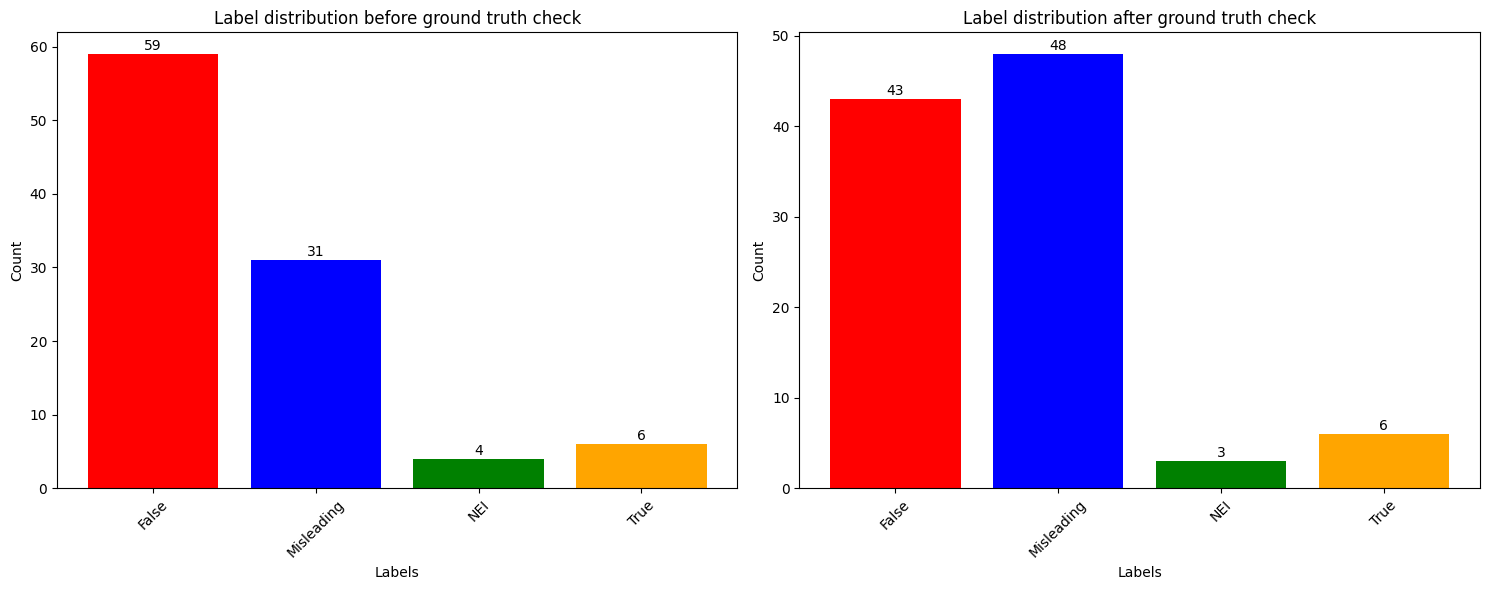

In [62]:
## Visualize the label distributions
import matplotlib.pyplot as plt
import numpy as np

# Get label distributions
original_label_distribution = df_gaza_israel_final_merged["Label"].value_counts()
corrected_label_distribution = df_gaza_israel_final_merged["actual_gt_label"].value_counts()

# Get unique labels from both distributions
all_labels = list(set(original_label_distribution.index) | set(corrected_label_distribution.index))
all_labels.sort()  # Sort for consistent ordering

# Define consistent colors for each label
colors = ['red', 'blue', 'green', 'orange']  # You can customize these colors
label_colors = {label: colors[i % len(colors)] for i, label in enumerate(all_labels)}

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot original label distribution (left subplot)
original_values = [original_label_distribution.get(label, 0) for label in all_labels]
original_colors = [label_colors[label] for label in all_labels]

bars1 = axes[0].bar(all_labels, original_values, color=original_colors)
axes[0].set_ylabel("Count")
axes[0].set_xlabel("Labels")
axes[0].set_title("Label distribution before ground truth check")
axes[0].tick_params(axis='x', rotation=45)

# Add frequency labels on bars
for i, (bar, value) in enumerate(zip(bars1, original_values)):
    if value > 0:  # Only add label if count is greater than 0
        axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
                    str(value), ha='center', va='bottom', fontsize=10)

# Plot corrected label distribution (right subplot)
corrected_values = [corrected_label_distribution.get(label, 0) for label in all_labels]
corrected_colors = [label_colors[label] for label in all_labels]

bars2 = axes[1].bar(all_labels, corrected_values, color=corrected_colors)
axes[1].set_ylabel("Count")
axes[1].set_xlabel("Labels")
axes[1].set_title("Label distribution after ground truth check")
axes[1].tick_params(axis='x', rotation=45)

# Add frequency labels on bars
for i, (bar, value) in enumerate(zip(bars2, corrected_values)):
    if value > 0:  # Only add label if count is greater than 0
        axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
                    str(value), ha='center', va='bottom', fontsize=10)

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()


In [63]:
claims_gt_label_incorrect.groupby("Website")["Normal_Image"].value_counts()

Website             Normal_Image
AFP Factcheck       True            9
Politifact          False           1
                    True            1
checkyourfact.com   False           1
                    True            1
logicallyfacts.com  True            3
misbar.com          True            1
newsmeter.in        False           1
                    True            1
Name: count, dtype: int64

In [64]:
claims_gt_label_incorrect.groupby("Website")["actual_gt_label"].value_counts()

Website             actual_gt_label
AFP Factcheck       Misleading         9
Politifact          Misleading         2
checkyourfact.com   Misleading         2
logicallyfacts.com  Misleading         3
misbar.com          Misleading         1
newsmeter.in        False              1
                    Misleading         1
Name: count, dtype: int64

In [65]:
## Let's save the merged df 

df_gaza_israel_final_merged.to_csv("gaza_israel_dataset_combined_010724_300425_final_gt_label_checked.csv")